### Context

#### About organization:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

#### Objective:

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### Attribute Information

- country: Name of the country  
- child_mort: Death of children under 5 years of age per 1000 live births  
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita  
- health: Total health spending per capita. Given as %age of GDP per capita  
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita  
- Income: Net income per person  
- Inflation: The measurement of the annual growth rate of the Total GDP  
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same  
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same  
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population  

### Data Source

**Datasets:**

- [Country Data from kaggle](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data)
- [Global Inflation Data from kaggle](https://www.kaggle.com/datasets/sazidthe1/global-inflation-data)
- [GDP Per Capita from data.worldbank.org](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)
- [Life Expectancy from data.worldbank.org](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=CO.)
- [Child Mortality from genderdata.worldbank.org](https://genderdata.worldbank.org/en/indicator/sh-dyn-mort)


### Data Importing and Overview

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [184]:
df = pd.read_csv('Data/archive/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [185]:
df_inflation = pd.read_csv('Data/archive/global_inflation_data.csv')
df_inflation.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,27.5,71.5,47.4,43.8,58.19,33.99,20.01,14.0,14.01,14.01,14.01,14.01,0.0,-43.4,51.93,35.66,16.36,10.57,6.78,8.68,26.42,-6.81,2.18,11.8,6.44,7.39,4.67,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,35.7,226.00,85.00,22.60,7.8,12.70,33.20,20.60,0.40,0.0,3.1,5.20,2.40,2.90,2.40,2.40,3.00,3.30,2.20,3.60,3.4,2.00,1.90,1.60,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,5.9,9.2,9.3,25.9,31.70,20.50,29.00,29.8,18.70,5.70,5.00,2.60,0.3,4.2,1.40,4.30,4.00,1.40,2.30,3.70,4.90,5.70,3.90,4.5,8.90,3.30,2.90,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,3.10,2.90,3.50,3.70,2.70,4.30,-1.20,1.70,2.6,1.50,0.50,-0.10,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,85.3,299.10,1379.50,949.80,2672.2,4146.00,221.50,107.40,248.20,325.0,152.6,108.90,98.20,43.50,23.00,13.30,12.20,12.50,13.70,14.50,13.5,10.30,8.80,7.30,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


In [186]:
print(df_inflation.columns)
df_inflation.drop(['indicator_name', '1980', '1981', '1982', '1983','1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022','2024'], axis = 1, inplace= True)
df_inflation = df_inflation.rename(columns={'country_name': 'country'})
df_inflation = df_inflation.rename(columns={'2023': 'Updated Inflation'})

Index(['country_name', 'indicator_name', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')


In [187]:
df_inflation.head()

,country,Updated Inflation
0,Afghanistan,9.1
1,Albania,4.8
2,Algeria,9.0
3,Andorra,5.2
4,Angola,13.1


In [188]:
df_child_mort = pd.read_csv('Data/archive/Mortality rate, under-5 (per 1,000 live births).csv')
df_child_mort.head()

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,"Mortality rate, under-5, female (per 1,000 liv...",SH.DYN.MORT.FE,Africa Eastern and Southern,AFE,2021,52.140,female
1,"Mortality rate, under-5, female (per 1,000 liv...",SH.DYN.MORT.FE,Africa Eastern and Southern,AFE,2020,53.874,female
2,"Mortality rate, under-5, female (per 1,000 liv...",SH.DYN.MORT.FE,Africa Eastern and Southern,AFE,2019,55.562,female
3,"Mortality rate, under-5, female (per 1,000 liv...",SH.DYN.MORT.FE,Africa Eastern and Southern,AFE,2018,57.430,female
4,"Mortality rate, under-5, female (per 1,000 liv...",SH.DYN.MORT.FE,Africa Eastern and Southern,AFE,2017,59.510,female


In [189]:
df_child_mort = df_child_mort[(df_child_mort['Year'] == 2021) & (df_child_mort['Disaggregation'] == 'total')]
print(df_child_mort.columns)
df_child_mort.drop(['Indicator Name', 'Indicator Code', 'Country Code', 'Year', 'Disaggregation'], axis = 1, inplace= True)
df_child_mort = df_child_mort.rename(columns={'Country Name': 'country'})
df_child_mort = df_child_mort.rename(columns={'Value': 'Updated Child Mort'})

Index(['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code',
       'Year', 'Value', 'Disaggregation'],
      dtype='object')


In [190]:
df_child_mort.head()

,country,Updated Child Mort
25192,Africa Eastern and Southern,57.285
25224,Africa Western and Central,94.372
25256,Arab World,34.455
25288,Caribbean small states,16.528
25320,Central Europe and the Baltics,4.622


In [191]:
df_gdpp = pd.read_csv('Data/archive/gdp-per-capita-maddison.csv')
df_gdpp.head()

,Entity,Code,Year,GDP per capita,900793-annotations
0,Afghanistan,AFG,1950,1156.0,NaN
1,Afghanistan,AFG,1951,1170.0,NaN
2,Afghanistan,AFG,1952,1189.0,NaN
3,Afghanistan,AFG,1953,1240.0,NaN
4,Afghanistan,AFG,1954,1245.0,NaN


In [192]:
df_gdpp = df_gdpp[df_gdpp['Year'] == 2022]
print(df_gdpp.columns)
df_gdpp.drop(['Code', 'Year', '900793-annotations'], axis = 1, inplace= True)
df_gdpp = df_gdpp.rename(columns={'Entity': 'country'})
df_gdpp = df_gdpp.rename(columns={'GDP per capita': 'Updated gdpp'})

Index(['Entity', 'Code', 'Year', 'GDP per capita', '900793-annotations'], dtype='object')


In [193]:
df_gdpp.head()

,country,Updated gdpp
72,Afghanistan,1357.9878
151,Albania,12978.1010
227,Algeria,13506.4440
300,Angola,6118.9050
453,Argentina,18292.3180


In [194]:
df_life_expec = pd.read_csv('Data/archive/life_expec.csv')
df_life_expec = df_life_expec.rename(columns={'Country Name': 'country'})
df_life_expec = df_life_expec.rename(columns={'Year': 'Updated life_expec'})

In [195]:
df_life_expec.head()

,country,Updated life_expec
0,Aruba,74.626000
1,Africa Eastern and Southern,62.454590
2,Afghanistan,61.982000
3,Africa Western and Central,56.988657
4,Angola,61.643000


In [196]:
df = pd.merge(df, df_inflation, on='country', how='left')
df = pd.merge(df, df_child_mort, on='country', how='left')
df = pd.merge(df, df_gdpp, on='country', how='left')
df = pd.merge(df, df_life_expec, on='country', how='left')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             167 non-null    object 
 1   child_mort          167 non-null    float64
 2   exports             167 non-null    float64
 3   health              167 non-null    float64
 4   imports             167 non-null    float64
 5   income              167 non-null    int64  
 6   inflation           167 non-null    float64
 7   life_expec          167 non-null    float64
 8   total_fer           167 non-null    float64
 9   gdpp                167 non-null    int64  
 10  Updated Inflation   149 non-null    float64
 11  Updated Child Mort  152 non-null    float64
 12  Updated gdpp        140 non-null    float64
 13  Updated life_expec  152 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 18.4+ KB


In [198]:
df['inflation'] = df['Updated Inflation'].combine_first(df['inflation'])
df['child_mort'] = df['Updated Child Mort'].combine_first(df['child_mort'])
df['gdpp'] = df['Updated gdpp'].combine_first(df['gdpp'])
df['life_expec'] = df['Updated life_expec'].combine_first(df['life_expec'])


In [199]:
df.drop(['Updated Inflation', 'Updated Child Mort', 'Updated gdpp', 'Updated life_expec', 'income'], axis = 1, inplace = True)

In [200]:
df.head(10)

,country,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,Afghanistan,55.7,10.0,7.58,44.9,9.1,61.982000,5.82,1357.9878
1,Albania,9.5,28.0,6.55,48.6,4.8,76.463000,1.65,12978.1010
2,Algeria,22.3,38.4,4.17,31.4,9.0,76.377000,2.89,13506.4440
3,Angola,69.4,62.3,2.85,42.9,13.1,61.643000,6.16,6118.9050
4,Antigua and Barbuda,6.1,45.5,6.03,58.9,5.0,78.497000,2.13,12200.0000
5,Argentina,6.9,18.9,8.10,16.0,121.7,75.390000,2.37,18292.3180
6,Armenia,10.7,20.8,4.40,45.3,3.5,72.043000,1.69,13837.5770
7,Australia,3.7,19.8,8.73,20.9,5.8,83.300000,1.93,52049.4300
8,Austria,3.7,51.3,11.00,47.8,7.8,81.239024,1.44,43792.8550
9,Azerbaijan,18.6,54.3,5.88,20.7,10.3,69.366000,1.92,17682.9400


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(8), object(1)
memory usage: 11.9+ KB


In [202]:
df.describe()

,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,26.298802,41.108976,6.815689,46.890215,12.746886,71.520057,2.947964,18655.523419
std,27.425068,27.412010,2.746837,24.209589,35.261955,7.565648,1.513848,20837.001563
min,2.000000,0.109000,1.810000,0.065900,-0.800000,52.525000,1.150000,334.000000
25%,5.900000,23.800000,4.920000,30.200000,4.050000,66.085000,1.795000,3500.000000
50%,14.400000,35.000000,6.320000,43.300000,6.000000,72.370683,2.410000,12200.000000
75%,39.200000,51.350000,8.600000,58.750000,10.200000,76.979500,3.880000,27291.145500
max,115.200000,200.000000,17.900000,174.000000,360.000000,84.445610,7.490000,149171.110000


### Data Cleaning

In [203]:
df[df['inflation'] == df['inflation'].min()]

,country,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
131,Seychelles,13.9,93.8,3.4,108.0,-0.8,73.397561,2.17,31055.39


Negative inflation, often referred to as deflation, is a decrease in the general price level of goods and services over a period of time. While it might seem like a positive event because it implies lower prices, it often has complex and potentially harmful effects on an economy:

1. **Reduced Consumer Spending**: When prices are falling, consumers may delay purchases in anticipation of further decreases in prices. This can lead to a reduction in overall consumer spending, which is a major component of economic activity.

2. **Increased Real Debt Burden**: If the nominal value of debt remains fixed, but prices and incomes fall, the real value of debt increases. This can make it more difficult for households and businesses to service their debts, potentially leading to higher default rates.

3. **Lower Profits for Businesses**: As prices fall, the revenue that businesses generate from selling goods and services may decline. If costs do not decrease at the same rate, profit margins can be squeezed, leading to reduced capital investment and possibly layoffs.

4. **Economic Recession**: The combination of reduced consumer spending, higher real debt burdens, and lower business profits can lead to a cycle of negative economic growth, increasing unemployment, and further deflation.

5. **Wage Spiral**: In some cases, deflation can lead to a downward spiral in wages as businesses attempt to cut costs in response to falling prices and declining demand. This can further reduce consumer spending and exacerbate economic decline.

6. **Policy Challenges**: Deflation can be difficult to manage through monetary policy. Central banks typically lower interest rates to combat deflation, but when rates are already low, they might hit the zero lower bound, beyond which they cannot be reduced further. This limits the effectiveness of monetary policy as a tool to stimulate the economy.

7. **Asset Price Deflation**: The prices of assets such as real estate and stocks may fall during deflationary periods, leading to losses for investors and impacting the broader financial system.

In [204]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [205]:
df.duplicated().sum()

0

### EDA

#### Univariate Analysis

##### Statistical Methods
1. **Mean**: Provides the average value, giving you a sense of the central tendency.
2. **Median**: The middle value in your data set, which is useful especially when your data is skewed.
3. **Mode**: The most frequently occurring value in the dataset.
4. **Range**: The difference between the maximum and minimum values, indicating the spread.
5. **Variance and Standard Deviation**: Measures of the spread or dispersion of your data around the mean.
6. **Quartiles and Percentiles**: These can help you understand the distribution of your data beyond the central tendency.
7. **Skewness and Kurtosis**: These metrics tell you about the asymmetry and the tailedness of the data distribution respectively.

##### Graphical Techniques
1. **Histogram**: Shows the frequency distribution of your data and is ideal for understanding the shape of the distribution, central tendencies, and spread.
2. **Box Plot (Box and Whisker Plot)**: Useful for visualizing the median, quartiles, and potential outliers in your data.
3. **Density Plot**: A smoothed version of the histogram, often used for understanding the distribution shape and identifying modes.
4. **Cumulative Frequency Plot**: Helps in understanding the cumulative distribution function of your data.
5. **Dot Plot**: Simple and effective for smaller datasets or to highlight individual data values.
6. **Violin Plot**: Similar to box plots but also shows the probability density of the data at different values.

##### Implementation Approach
- **Descriptive Statistics**: Start by computing basic descriptive statistics (mean, median, mode, etc.) to get an initial understanding of your data.
- **Visual Exploration**: Use plots like histograms or box plots to visually assess the distributions, spot outliers, understand variability, and check for normality.
- **Deeper Insights**: Depending on initial findings, you might calculate skewness and kurtosis to quantify how much your data deviates from a normal distribution.

In [206]:
df.head()

,country,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,Afghanistan,55.7,10.0,7.58,44.9,9.1,61.982,5.82,1357.9878
1,Albania,9.5,28.0,6.55,48.6,4.8,76.463,1.65,12978.1010
2,Algeria,22.3,38.4,4.17,31.4,9.0,76.377,2.89,13506.4440
3,Angola,69.4,62.3,2.85,42.9,13.1,61.643,6.16,6118.9050
4,Antigua and Barbuda,6.1,45.5,6.03,58.9,5.0,78.497,2.13,12200.0000


<Axes: >

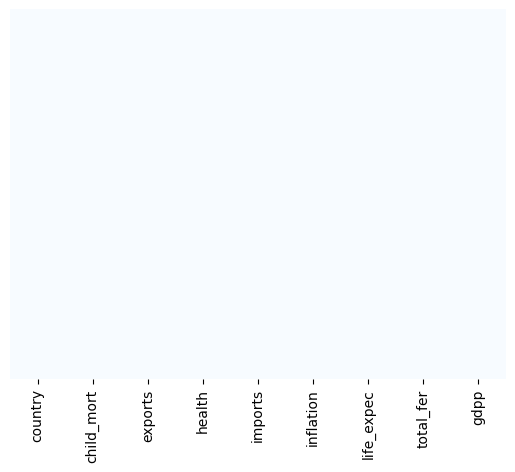

In [207]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [208]:
df.describe()

,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,26.298802,41.108976,6.815689,46.890215,12.746886,71.520057,2.947964,18655.523419
std,27.425068,27.412010,2.746837,24.209589,35.261955,7.565648,1.513848,20837.001563
min,2.000000,0.109000,1.810000,0.065900,-0.800000,52.525000,1.150000,334.000000
25%,5.900000,23.800000,4.920000,30.200000,4.050000,66.085000,1.795000,3500.000000
50%,14.400000,35.000000,6.320000,43.300000,6.000000,72.370683,2.410000,12200.000000
75%,39.200000,51.350000,8.600000,58.750000,10.200000,76.979500,3.880000,27291.145500
max,115.200000,200.000000,17.900000,174.000000,360.000000,84.445610,7.490000,149171.110000


array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'inflation'}>,
        <Axes: title={'center': 'life_expec'}>],
       [<Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>, <Axes: >]], dtype=object)

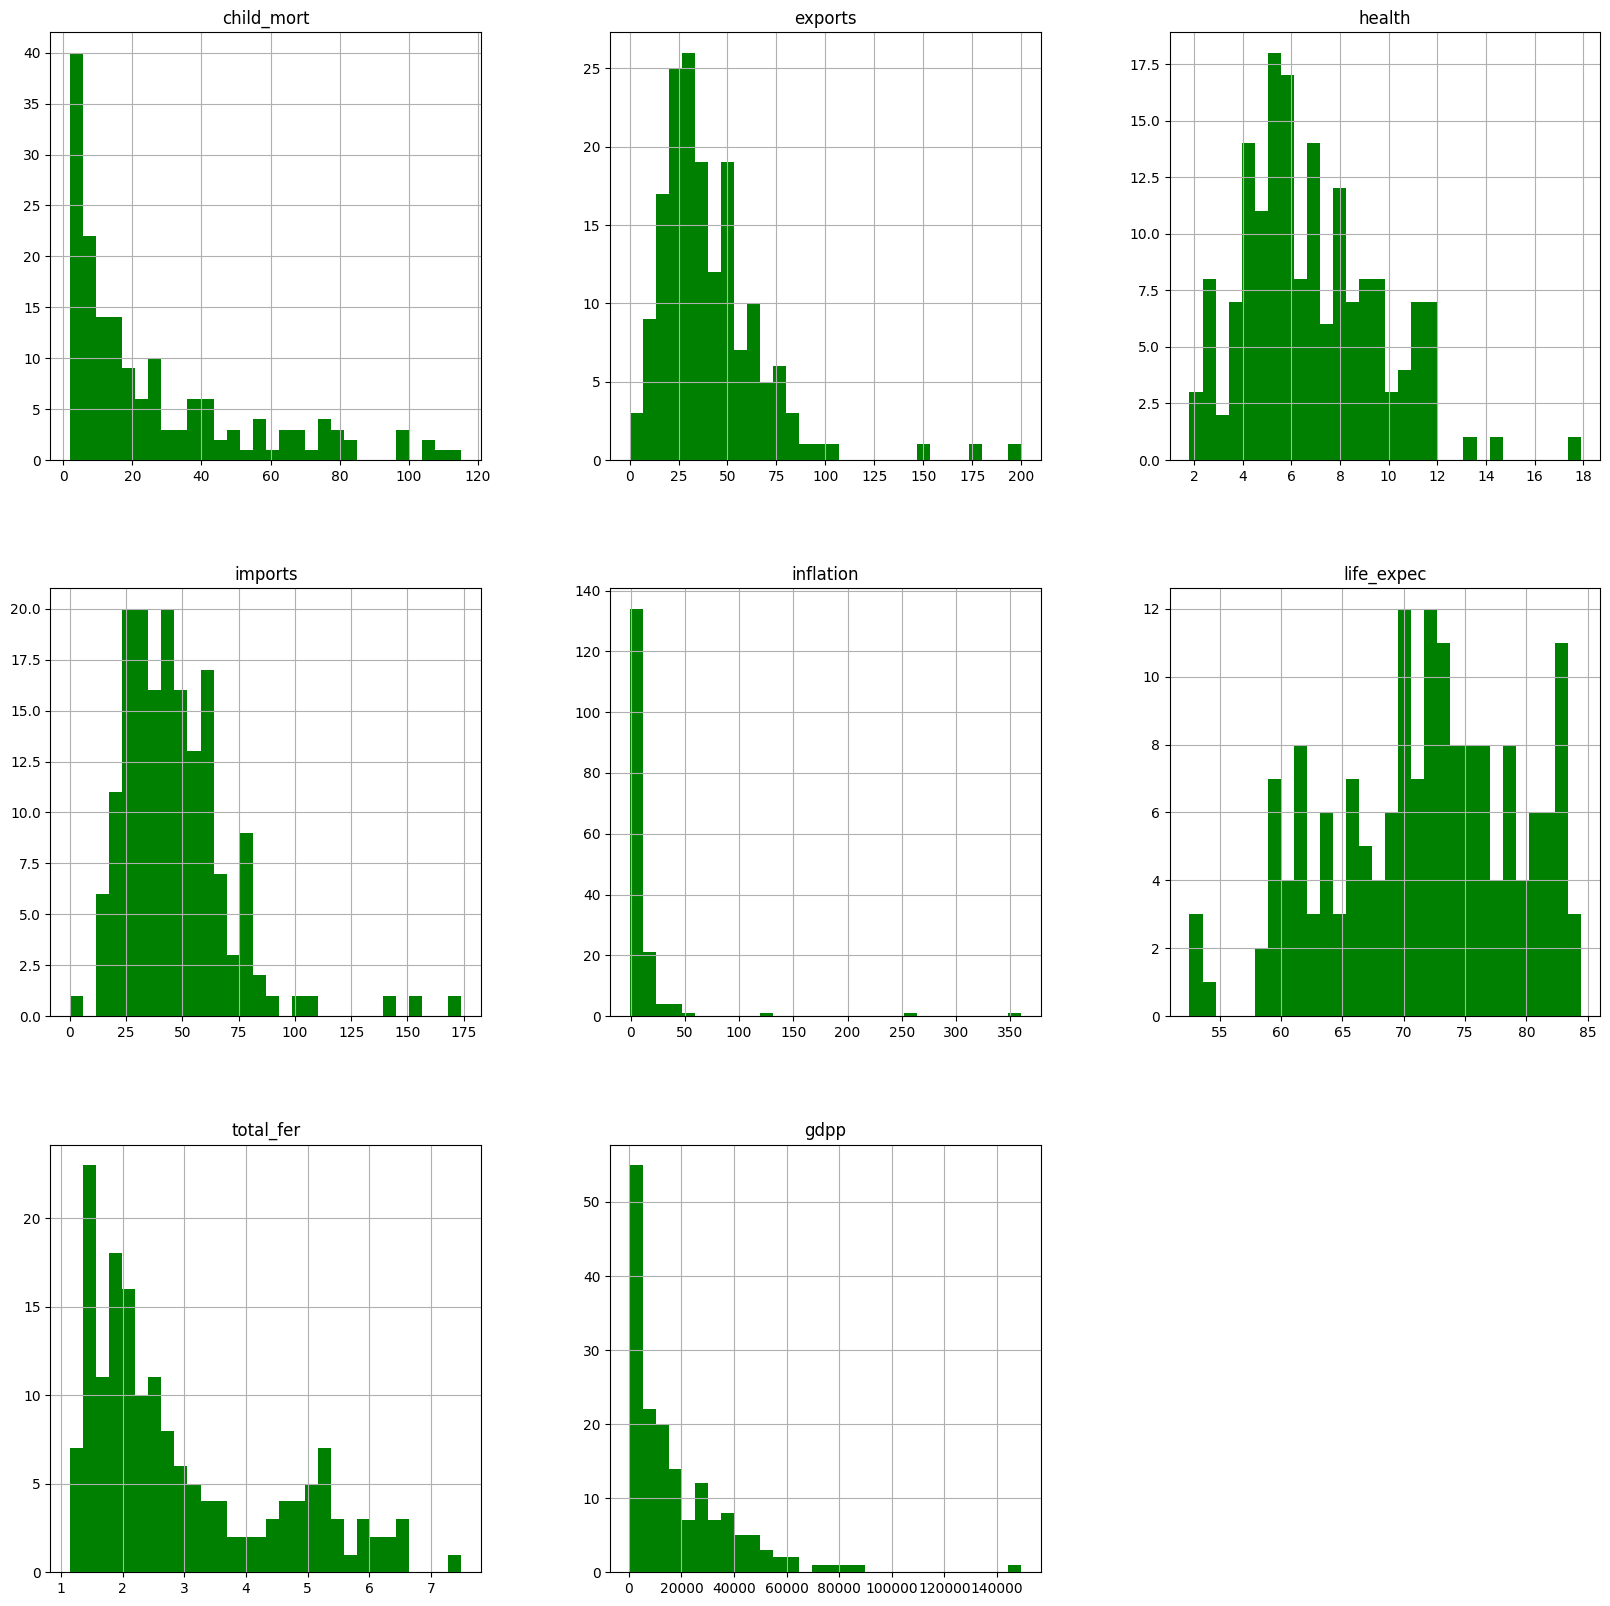

In [209]:
df.hist(bins = 30, figsize = (20,20), color = 'g')

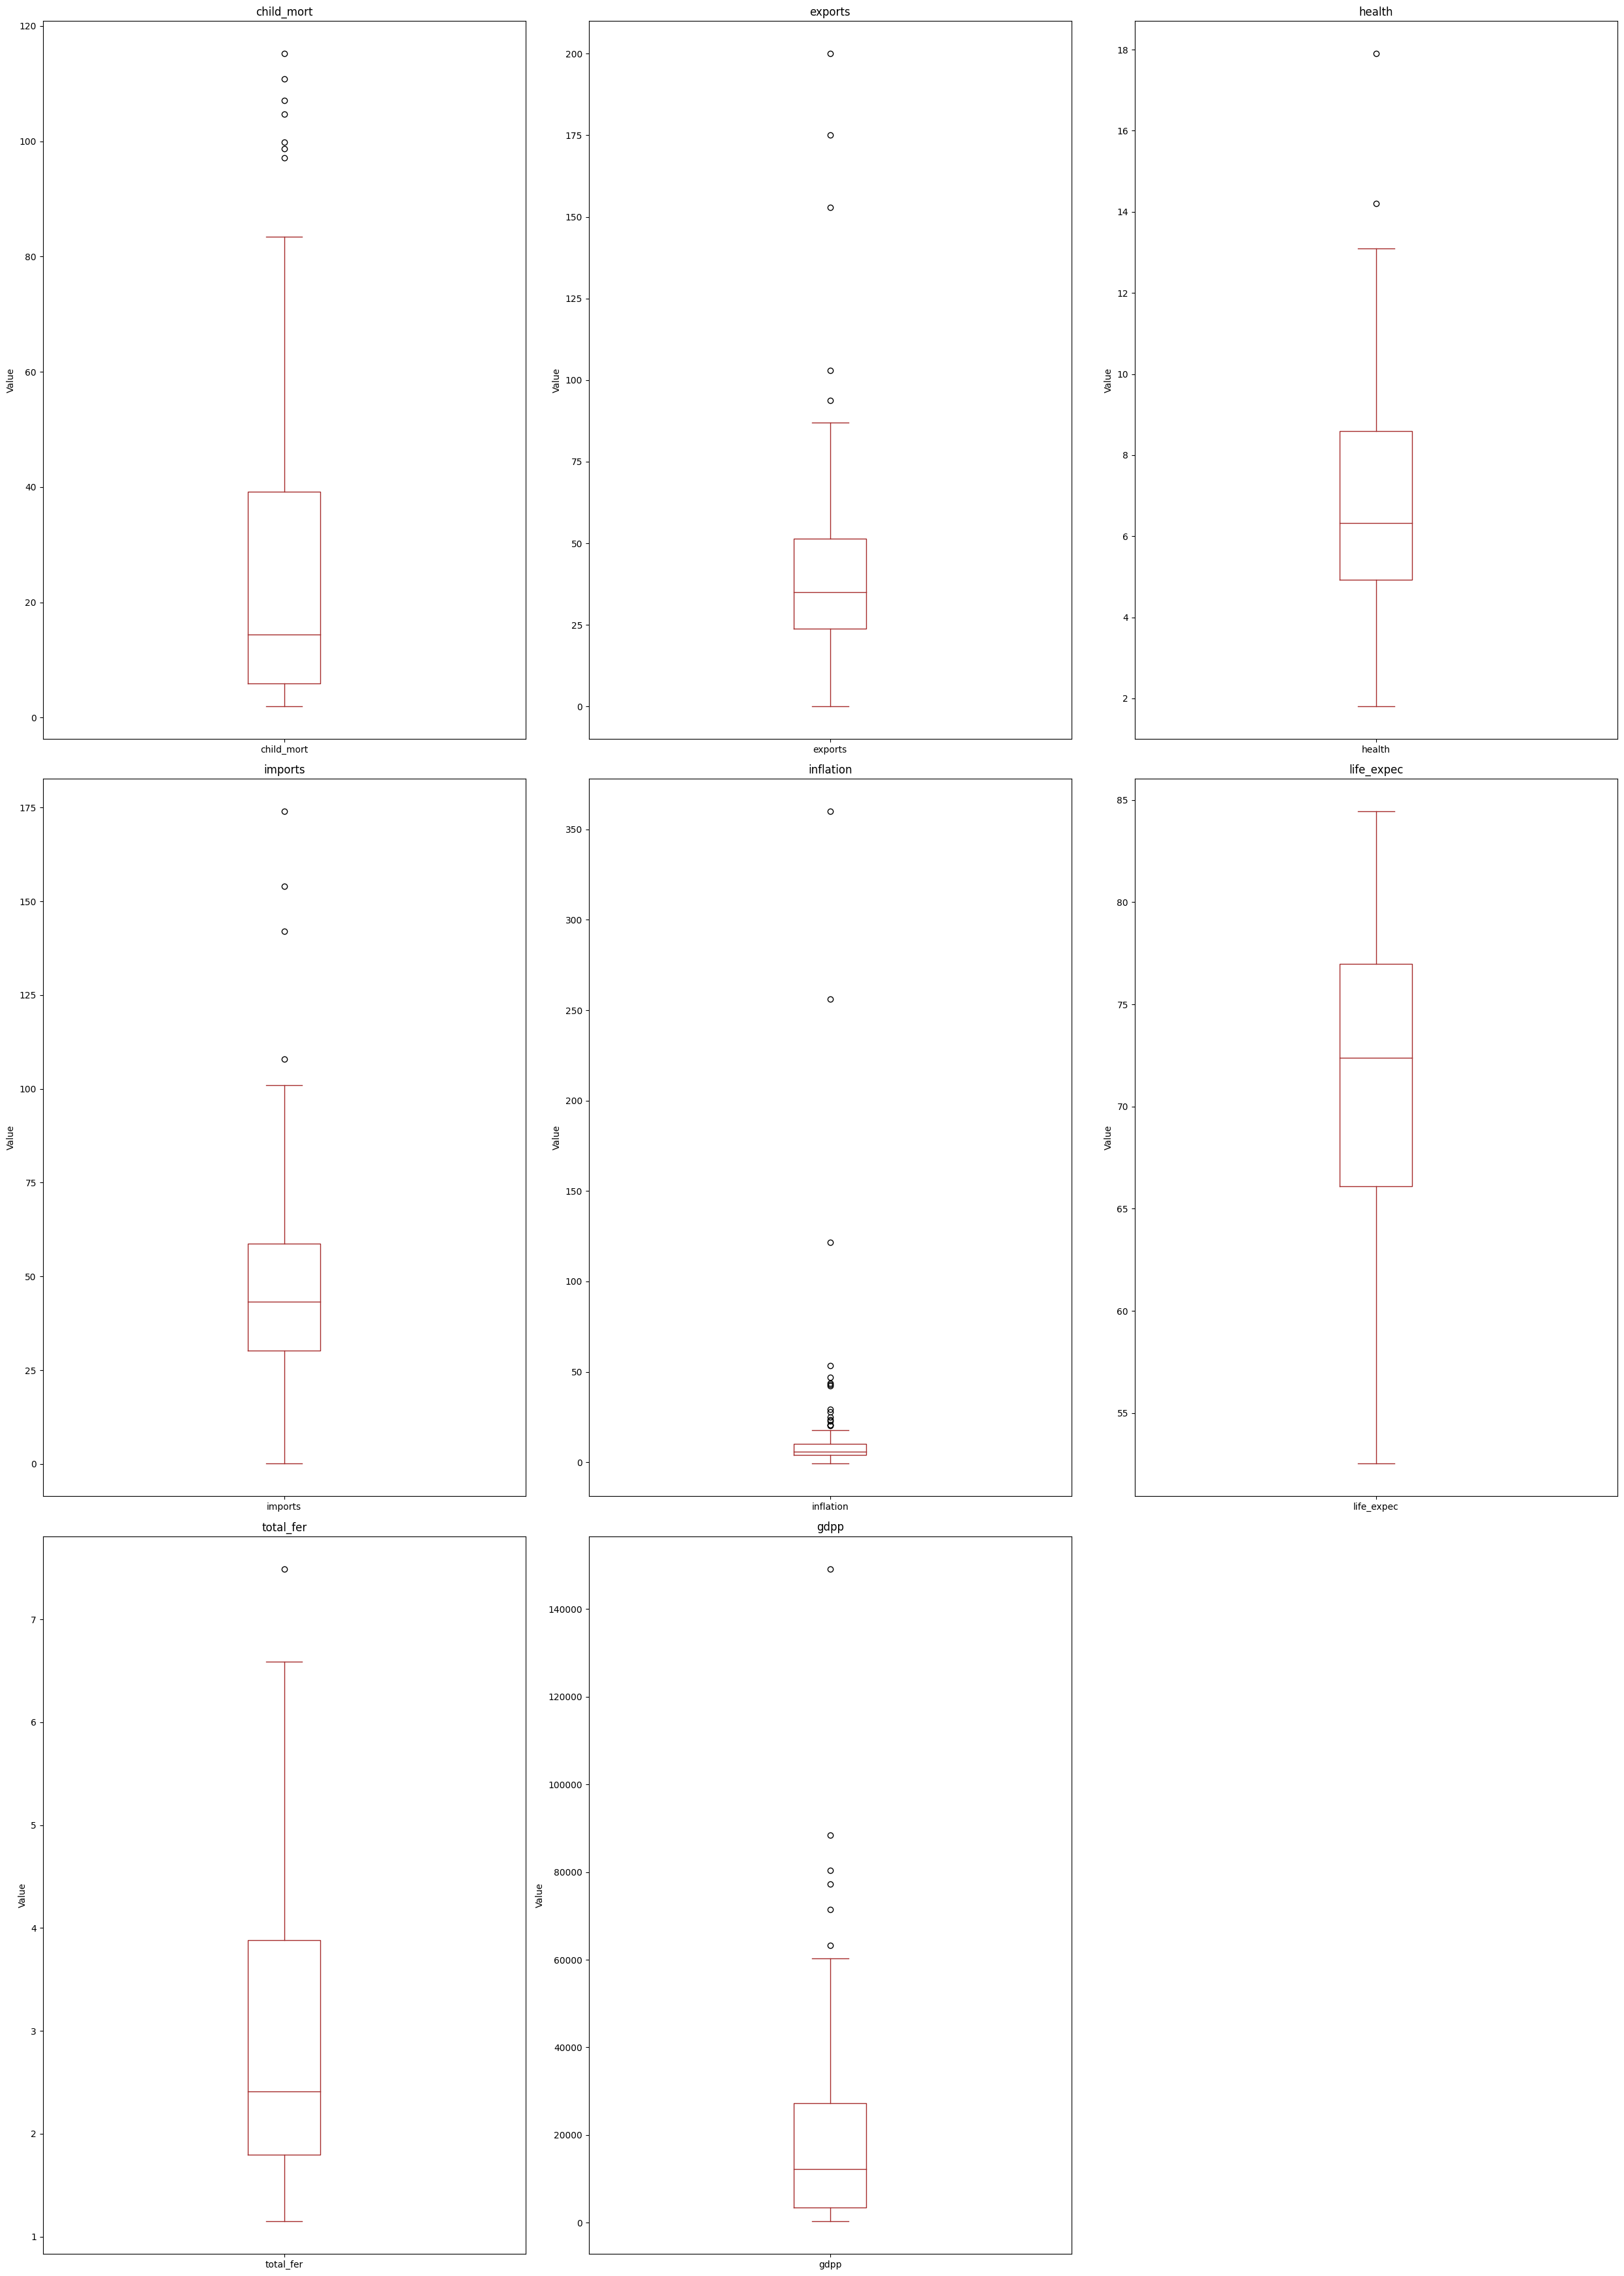

In [210]:
# Assuming df is your original DataFrame and you've already removed non-numeric columns like 'country'
df_numeric = df.drop(['country'], axis=1)

# Assuming df_numeric is your DataFrame with the numeric columns you want to plot
plt.figure(figsize=(25, 35))  # Set the overall figure size

# Creating a subplot for each numeric variable
for i, var in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i + 1)  # Arrange the plots in a 3x3 grid or adjust based on the number of columns

    # Plotting a box plot
    df_numeric[var].plot(kind='box', ax=plt.gca(), color='brown')  # Using pandas plot function with kind='box'
    
    plt.title(var)  # Add a title for each subplot to clearly identify the variable being plotted
    plt.ylabel('Value')  # Set the y-axis label to show the values

plt.tight_layout()  # Adjust layout to avoid overlap of subplots
plt.show()


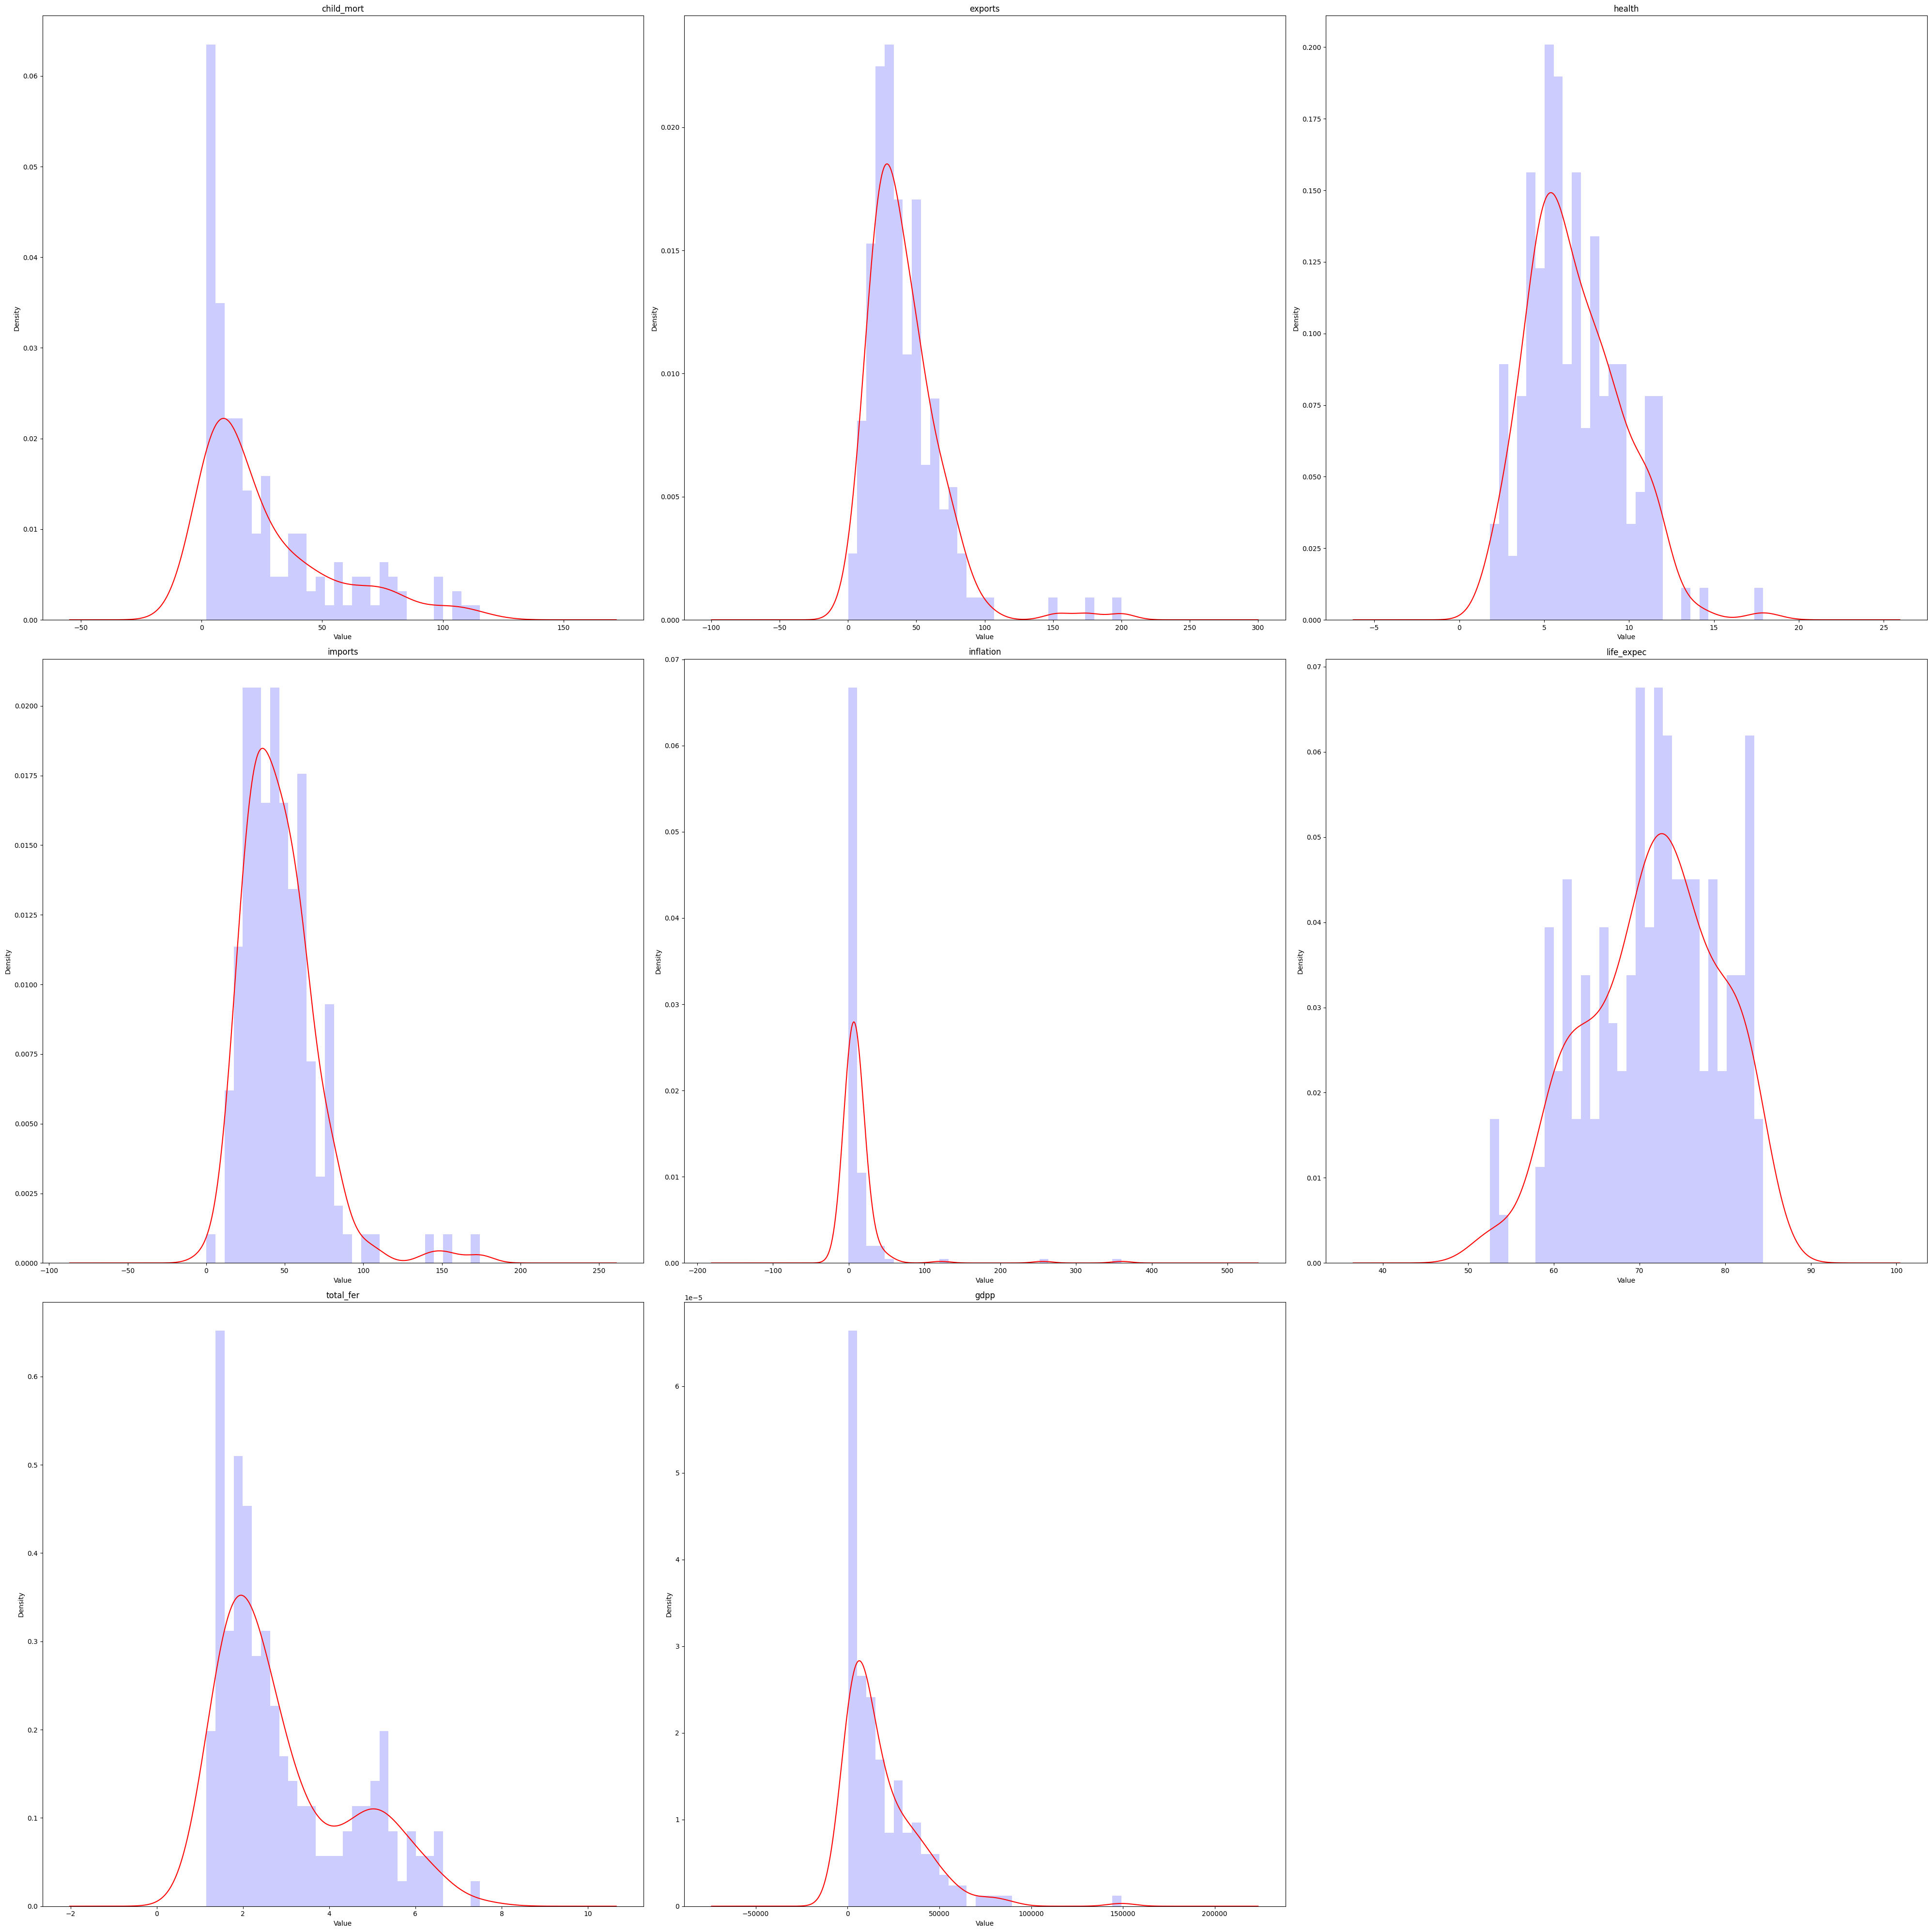

In [211]:
plt.figure(figsize=(40, 40))  # Set the overall figure size

# Creating a subplot for each numeric variable
for i, var in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i + 1)  # Arrange the plots in a 3x3 grid
    
    # Plotting a histogram
    df_numeric[var].plot(kind='hist', density=True, alpha=0.2, ax=plt.gca(), color='blue', bins=30)  
    # 'density=True' normalizes the histogram so it forms a probability density, 
    # 'alpha' sets the transparency level, and 'bins' controls the number of bins
    
    # Overlaying a density plot
    df_numeric[var].plot(kind='density', ax=plt.gca(), color='red')  # 'color' sets different colors for differentiation
    
    plt.title(var)  # Add a title for each subplot
    plt.xlabel('Value')  # Set the x-axis label
    plt.ylabel('Density')  # Set the y-axis label

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [212]:
import plotly.express as px

variables = df_numeric.columns.to_list()

# Function to create a choropleth map
def create_choropleth(df, variable):
    fig = px.choropleth(
        df,
        locations='country',
        locationmode='country names',
        color=variable,
        hover_name='country',
        color_continuous_scale=px.colors.sequential.Plasma,
        title=f'Choropleth Map of {variable.capitalize()}'
    )
    fig.show()

In [213]:
# Create choropleth maps for each variable
for var in variables:
    create_choropleth(df, var)

##### Univariate Analysis Summary


1. **Child Mortality (Death of children under 5 years of age per 1000 live births)**:
   - **Observation**: The histogram is heavily right-skewed.
   - **Interpretation**: Most countries have low child mortality rates, indicating better healthcare and living conditions. The long tail to the right suggests that a few countries have significantly higher child mortality rates, which might indicate poorer healthcare systems or socio-economic challenges.

2. **Exports (Exports of goods and services per capita as a % of GDP per capita)**:
   - **Observation**: The distribution is moderately right-skewed.
   - **Interpretation**: Many countries have low to moderate export percentages, indicating a smaller contribution of exports to their GDP. Fewer countries have high export percentages, potentially indicating strong export-oriented economies.

3. **Health (Total health spending per capita as a % of GDP per capita)**:
   - **Observation**: The distribution shows a right skew.
   - **Interpretation**: A significant number of countries have low health spending as a percentage of GDP, which might correlate with lower income or prioritization of other sectors. Higher health spending percentages are less common but may indicate countries with advanced healthcare systems and higher GDP allocations to health.

4. **Imports (Imports of goods and services per capita as a % of GDP per capita)**:
   - **Observation**: The imports distribution is similar to that of exports, showing right skewness.
   - **Interpretation**: Many countries have low to moderate import percentages, indicating less dependency on imported goods and services. Countries with high import percentages may have economies that rely more on imported goods and services, which could affect their trade balance.

5. **Inflation (Annual growth rate of the Total GDP)**:
   - **Observation**: The histogram is highly right-skewed.
   - **Interpretation**: A concentration of countries experiences low to moderate inflation rates. The right tail indicates that a few countries experience high inflation rates, which could point to economic instability or rapidly growing economies.

6. **Life Expectancy (Average number of years a newborn child would live)**:
   - **Observation**: The life expectancy distribution is roughly symmetrical with a slight skew to the right.
   - **Interpretation**: Many countries have higher life expectancy rates, suggesting better living conditions and healthcare. Lower life expectancy rates are less common but may indicate socio-economic challenges or poor healthcare systems in certain countries.

7. **Total Fertility Rate (Number of children born to each woman)**:
   - **Observation**: The fertility rate distribution is right-skewed.
   - **Interpretation**: Most countries have low to moderate fertility rates, which might be associated with higher income levels, better education, and access to family planning. Higher fertility rates are less common and might be found in countries with lower income levels and less access to family planning resources.

8. **GDP per Capita**:
   - **Observation**: The GDP per capita distribution is highly right-skewed.
   - **Interpretation**: Most countries have low to moderate GDP per capita. The long right tail indicates that a few countries have significantly higher GDP per capita, suggesting economic disparity. Higher GDP per capita is associated with more developed and wealthier countries.

#### Bivariate Analysis

##### Visualization Techniques
1. **Scatter Plots**:
   - Scatter plots can be used to visualize the relationship between two continuous variables, such as `income` and `life_expec`.
   - Adding a trend line can help identify the nature of the relationship (e.g., linear, exponential).

2. **Pair Plot (Scatterplot Matrix)**:
   - A pair plot can be used to visualize the pairwise relationships between multiple variables. This is useful for getting an overall sense of the relationships in the dataset.

3. **Box Plots**:
   - Box plots can be used to compare the distribution of a continuous variable across different categories. For example, `income` (continuous) across different levels of `total_fer` (categorized).

4. **Heatmaps**:
   - A heatmap of the correlation matrix can show the strength and direction of relationships between variables. This helps in identifying highly correlated pairs of variables.

5. **Line Plots**:
   - Line plots can be useful for time series data or when you want to show trends between two variables, such as `inflation` over time if time data is available.

##### Statistical Techniques
1. **Correlation Analysis**:
   - Pearson Correlation: Measures linear correlation between two continuous variables.
   - Spearman Rank Correlation: Measures the strength and direction of association between two ranked variables.
   - Kendall Tau Correlation: Measures the association between two variables based on the ranks.

2. **Regression Analysis**:
   - Simple Linear Regression: Analyzes the linear relationship between two variables (one independent and one dependent).
   - Multiple Regression: Analyzes the relationship between one dependent variable and two or more independent variables.

3. **Chi-Square Test**:
   - This test can be used to determine if there is a significant association between two categorical variables.

4. **T-tests/ANOVA**:
   - T-tests can compare the means of a continuous variable across two categories.
   - ANOVA (Analysis of Variance) can compare the means of a continuous variable across multiple categories.

In [214]:
df.head()

,country,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,Afghanistan,55.7,10.0,7.58,44.9,9.1,61.982,5.82,1357.9878
1,Albania,9.5,28.0,6.55,48.6,4.8,76.463,1.65,12978.1010
2,Algeria,22.3,38.4,4.17,31.4,9.0,76.377,2.89,13506.4440
3,Angola,69.4,62.3,2.85,42.9,13.1,61.643,6.16,6118.9050
4,Antigua and Barbuda,6.1,45.5,6.03,58.9,5.0,78.497,2.13,12200.0000


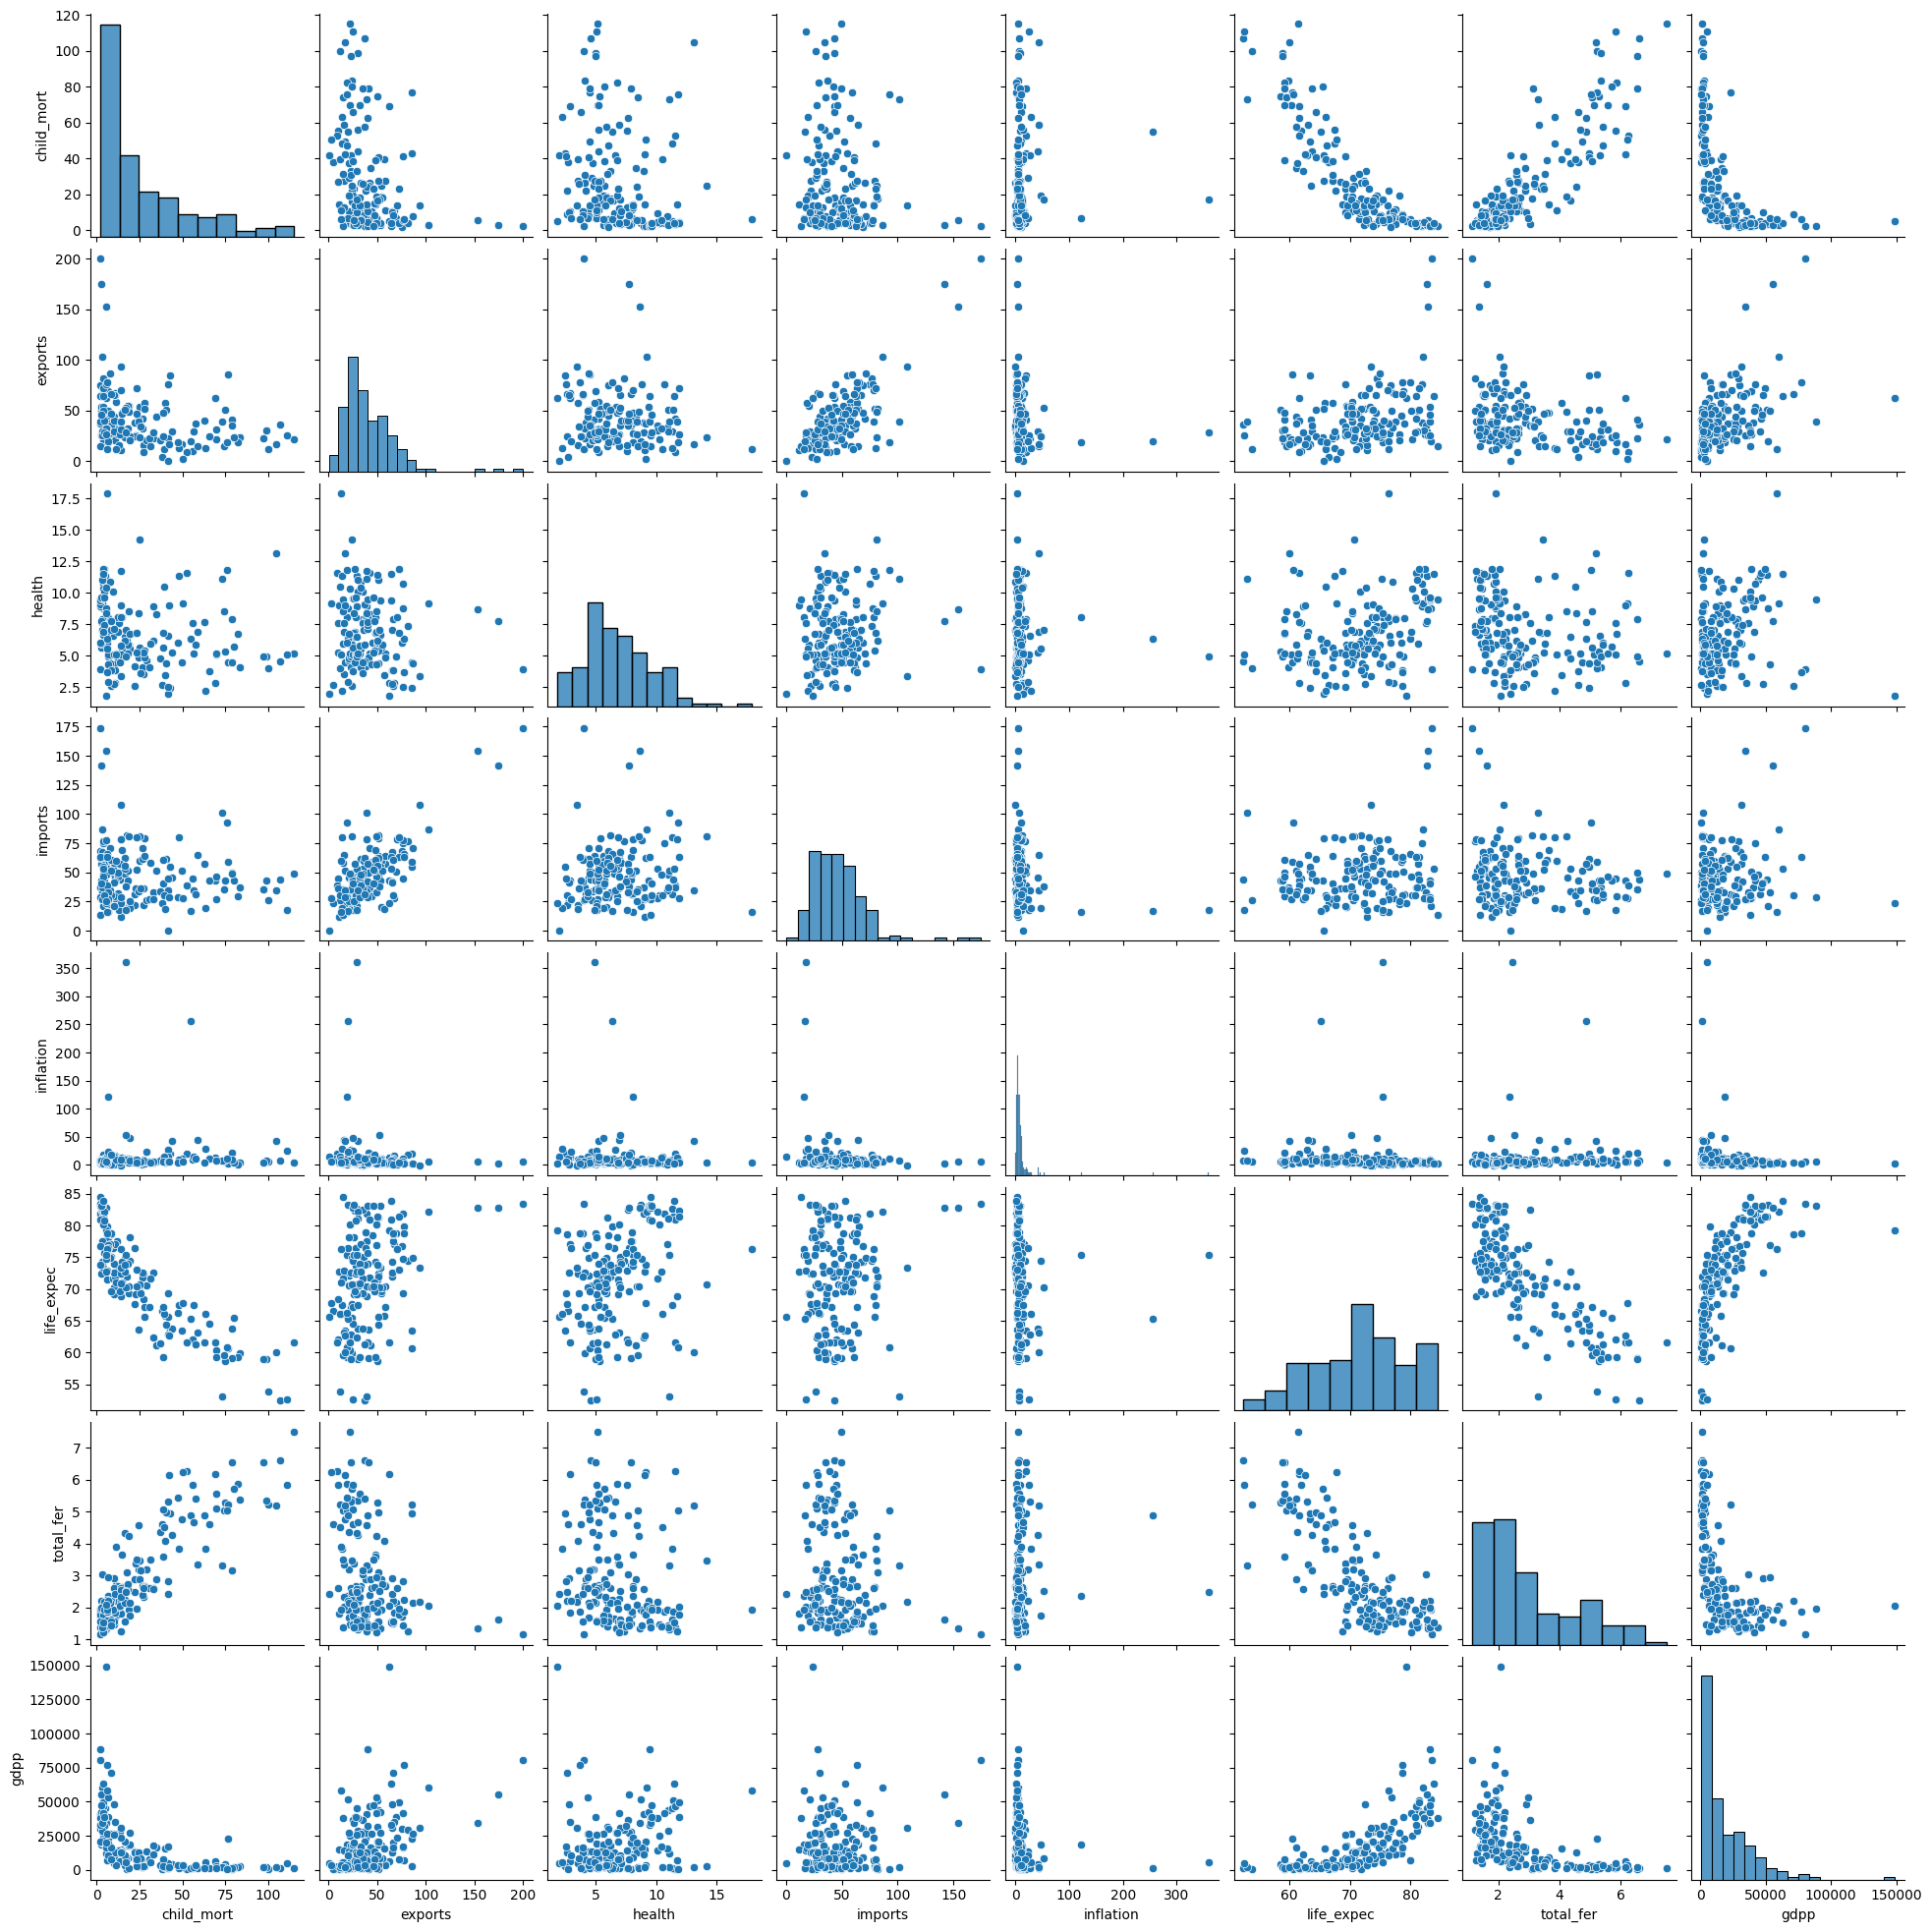

In [215]:
sns.pairplot(df_numeric)

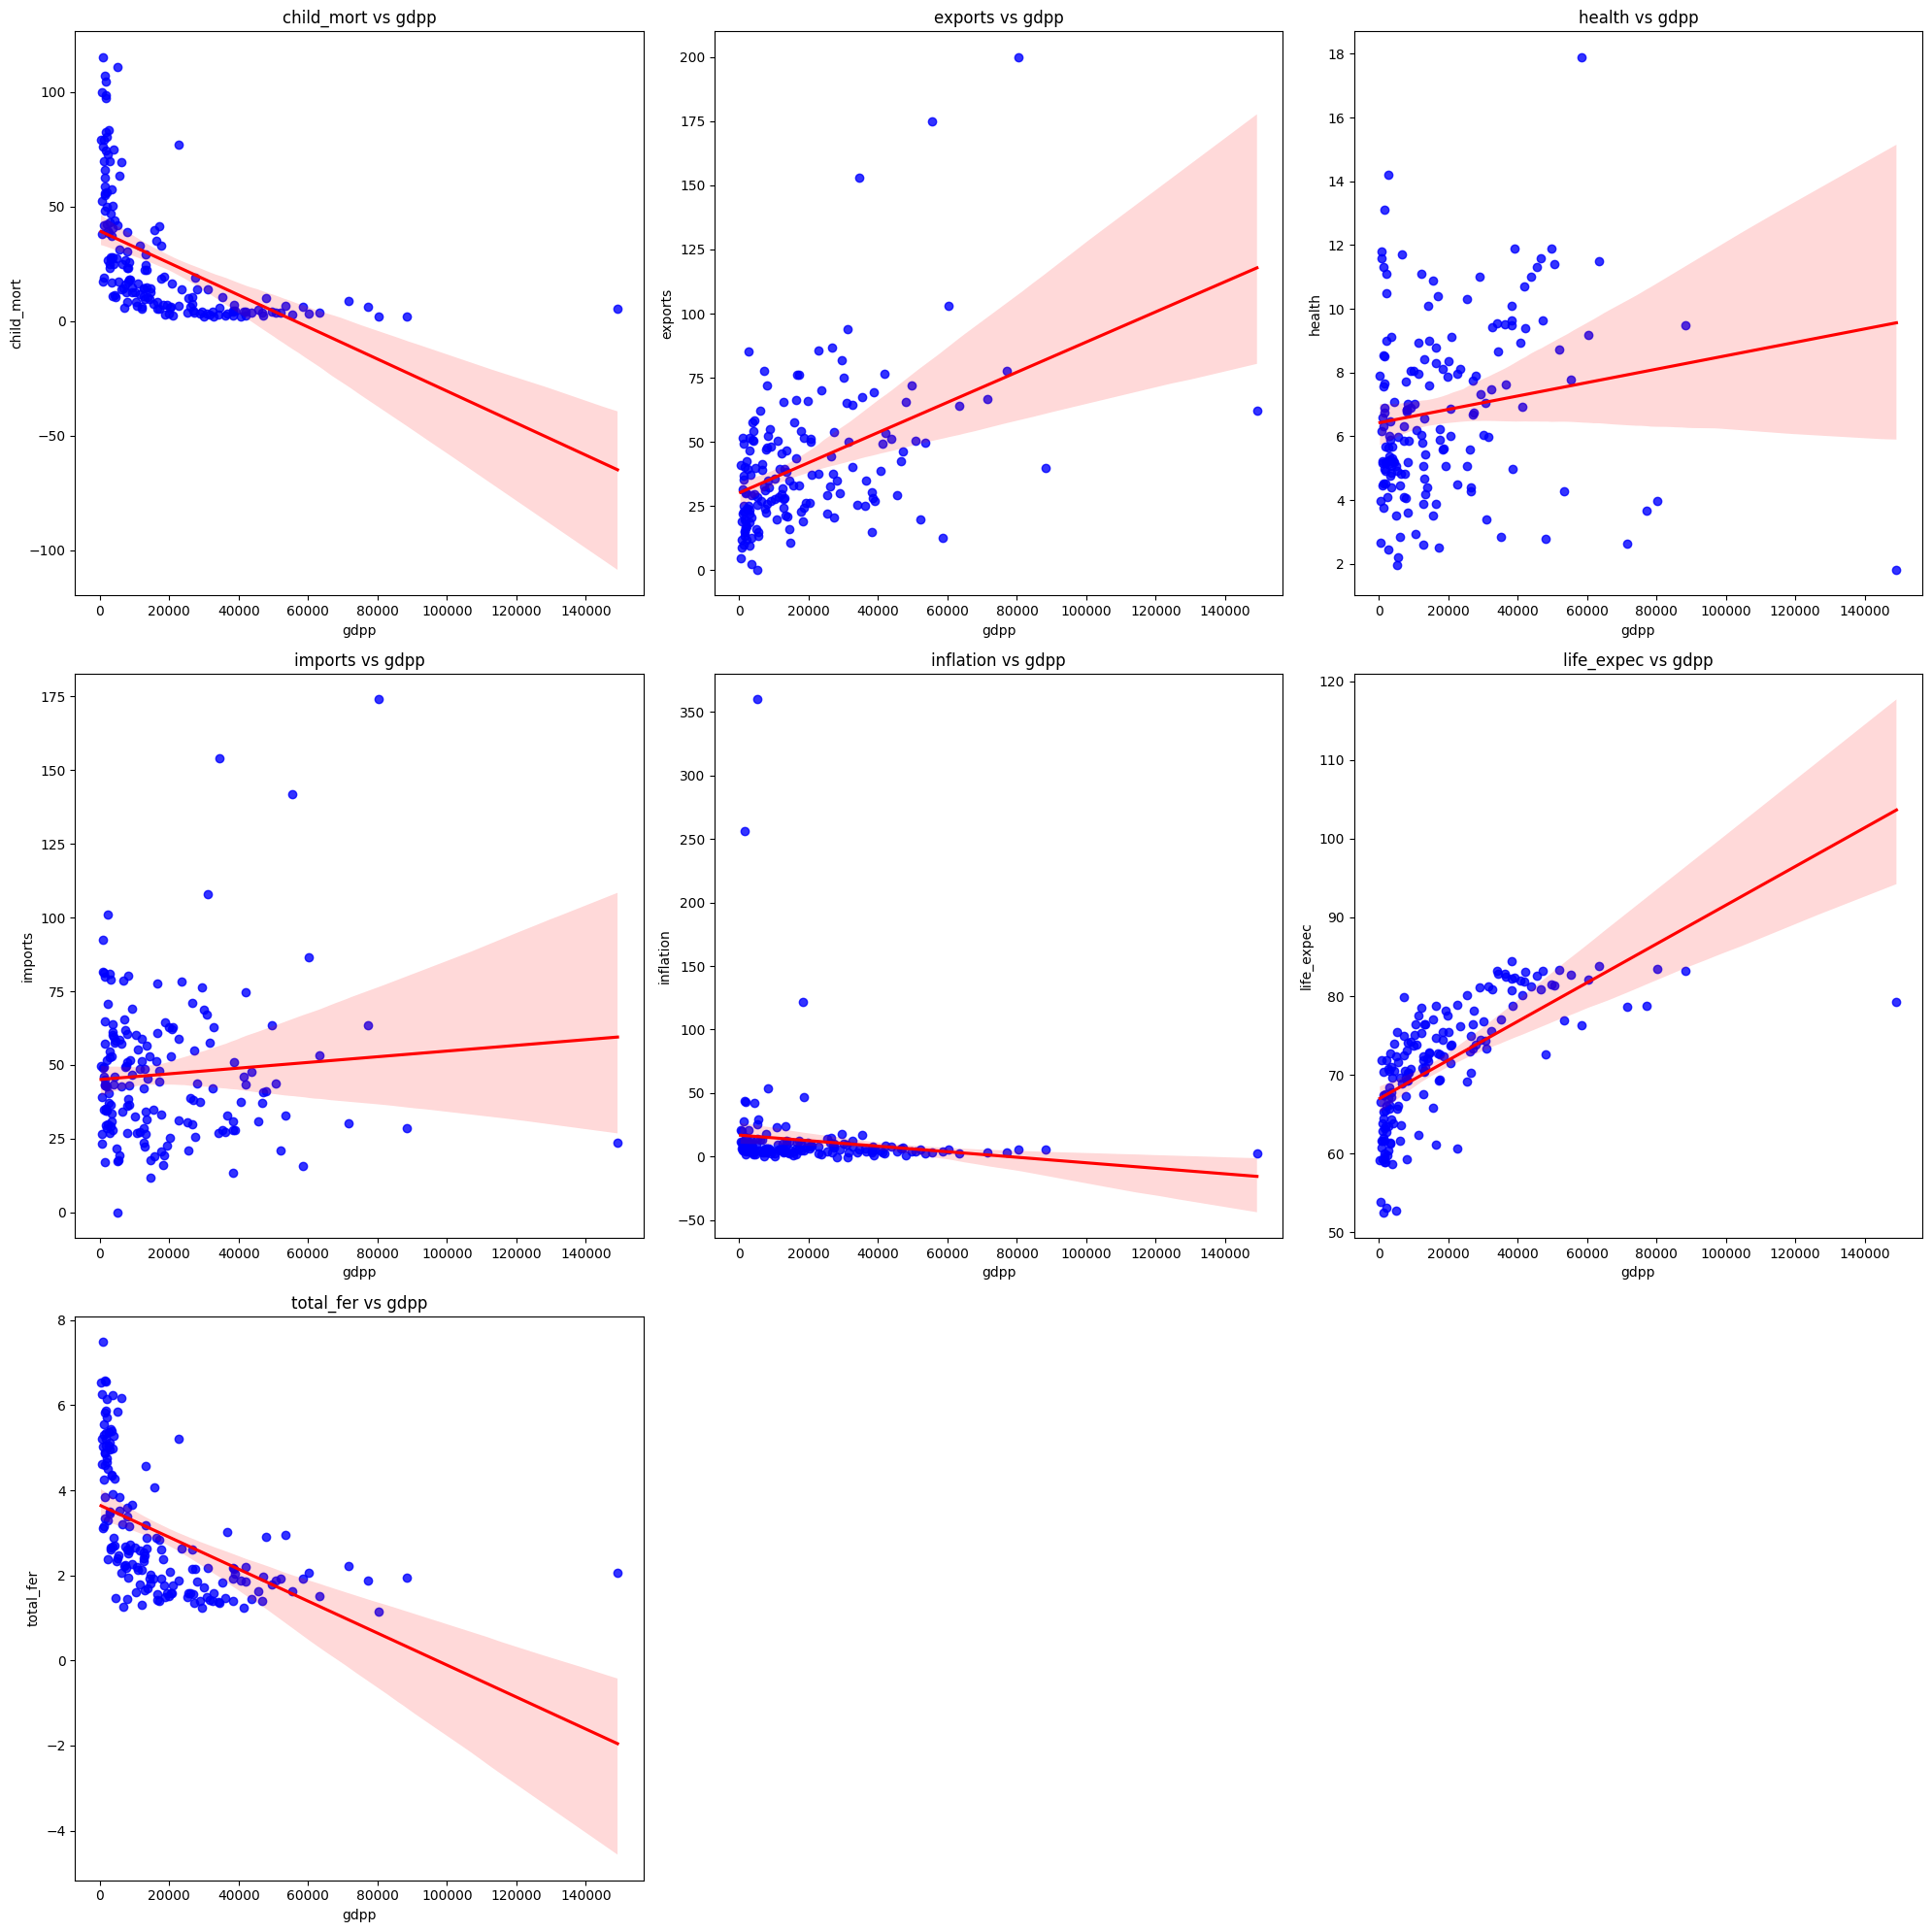

In [216]:
df_numeric_modified = df_numeric.drop(['gdpp'], axis = 1)

# Set the size of the plot
plt.figure(figsize=(20, 20))

# Loop through the variables and create scatter plots with regression lines
for i, var in enumerate(df_numeric_modified):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=df_numeric['gdpp'], y=df_numeric[var], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(f'{var} vs gdpp')
    plt.xlabel('gdpp')
    plt.ylabel(var)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [217]:
df_log_transformed = df_numeric.copy()
for var in df_log_transformed.columns:
    df_log_transformed[var] = np.log1p(df_log_transformed[var])

In [218]:
df_log_transformed.fillna(0)

,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,4.037774,2.397895,2.149434,3.826465,2.312535,4.142849,1.919859,7.214495
1,2.351375,3.367296,2.021548,3.903991,1.757858,4.349800,0.974560,9.471096
2,3.148453,3.673766,1.642873,3.478158,2.302585,4.348690,1.358409,9.510996
3,4.254193,4.147885,1.348073,3.781914,2.646175,4.137452,1.968510,8.719302
4,1.960095,3.839452,1.950187,4.092677,1.791759,4.375719,1.141033,9.409273
...,...,...,...,...,...,...,...,...
162,3.186353,3.862833,1.832581,3.983413,2.332144,4.268984,1.504077,7.996654
163,2.895912,3.384390,1.776646,2.923162,5.888878,4.335983,1.244155,8.569439
164,3.190476,4.290459,2.059239,4.396915,1.481605,4.305416,1.081805,8.993596
165,4.048301,3.433987,1.821318,3.566712,2.766319,4.226834,1.735189,7.580863


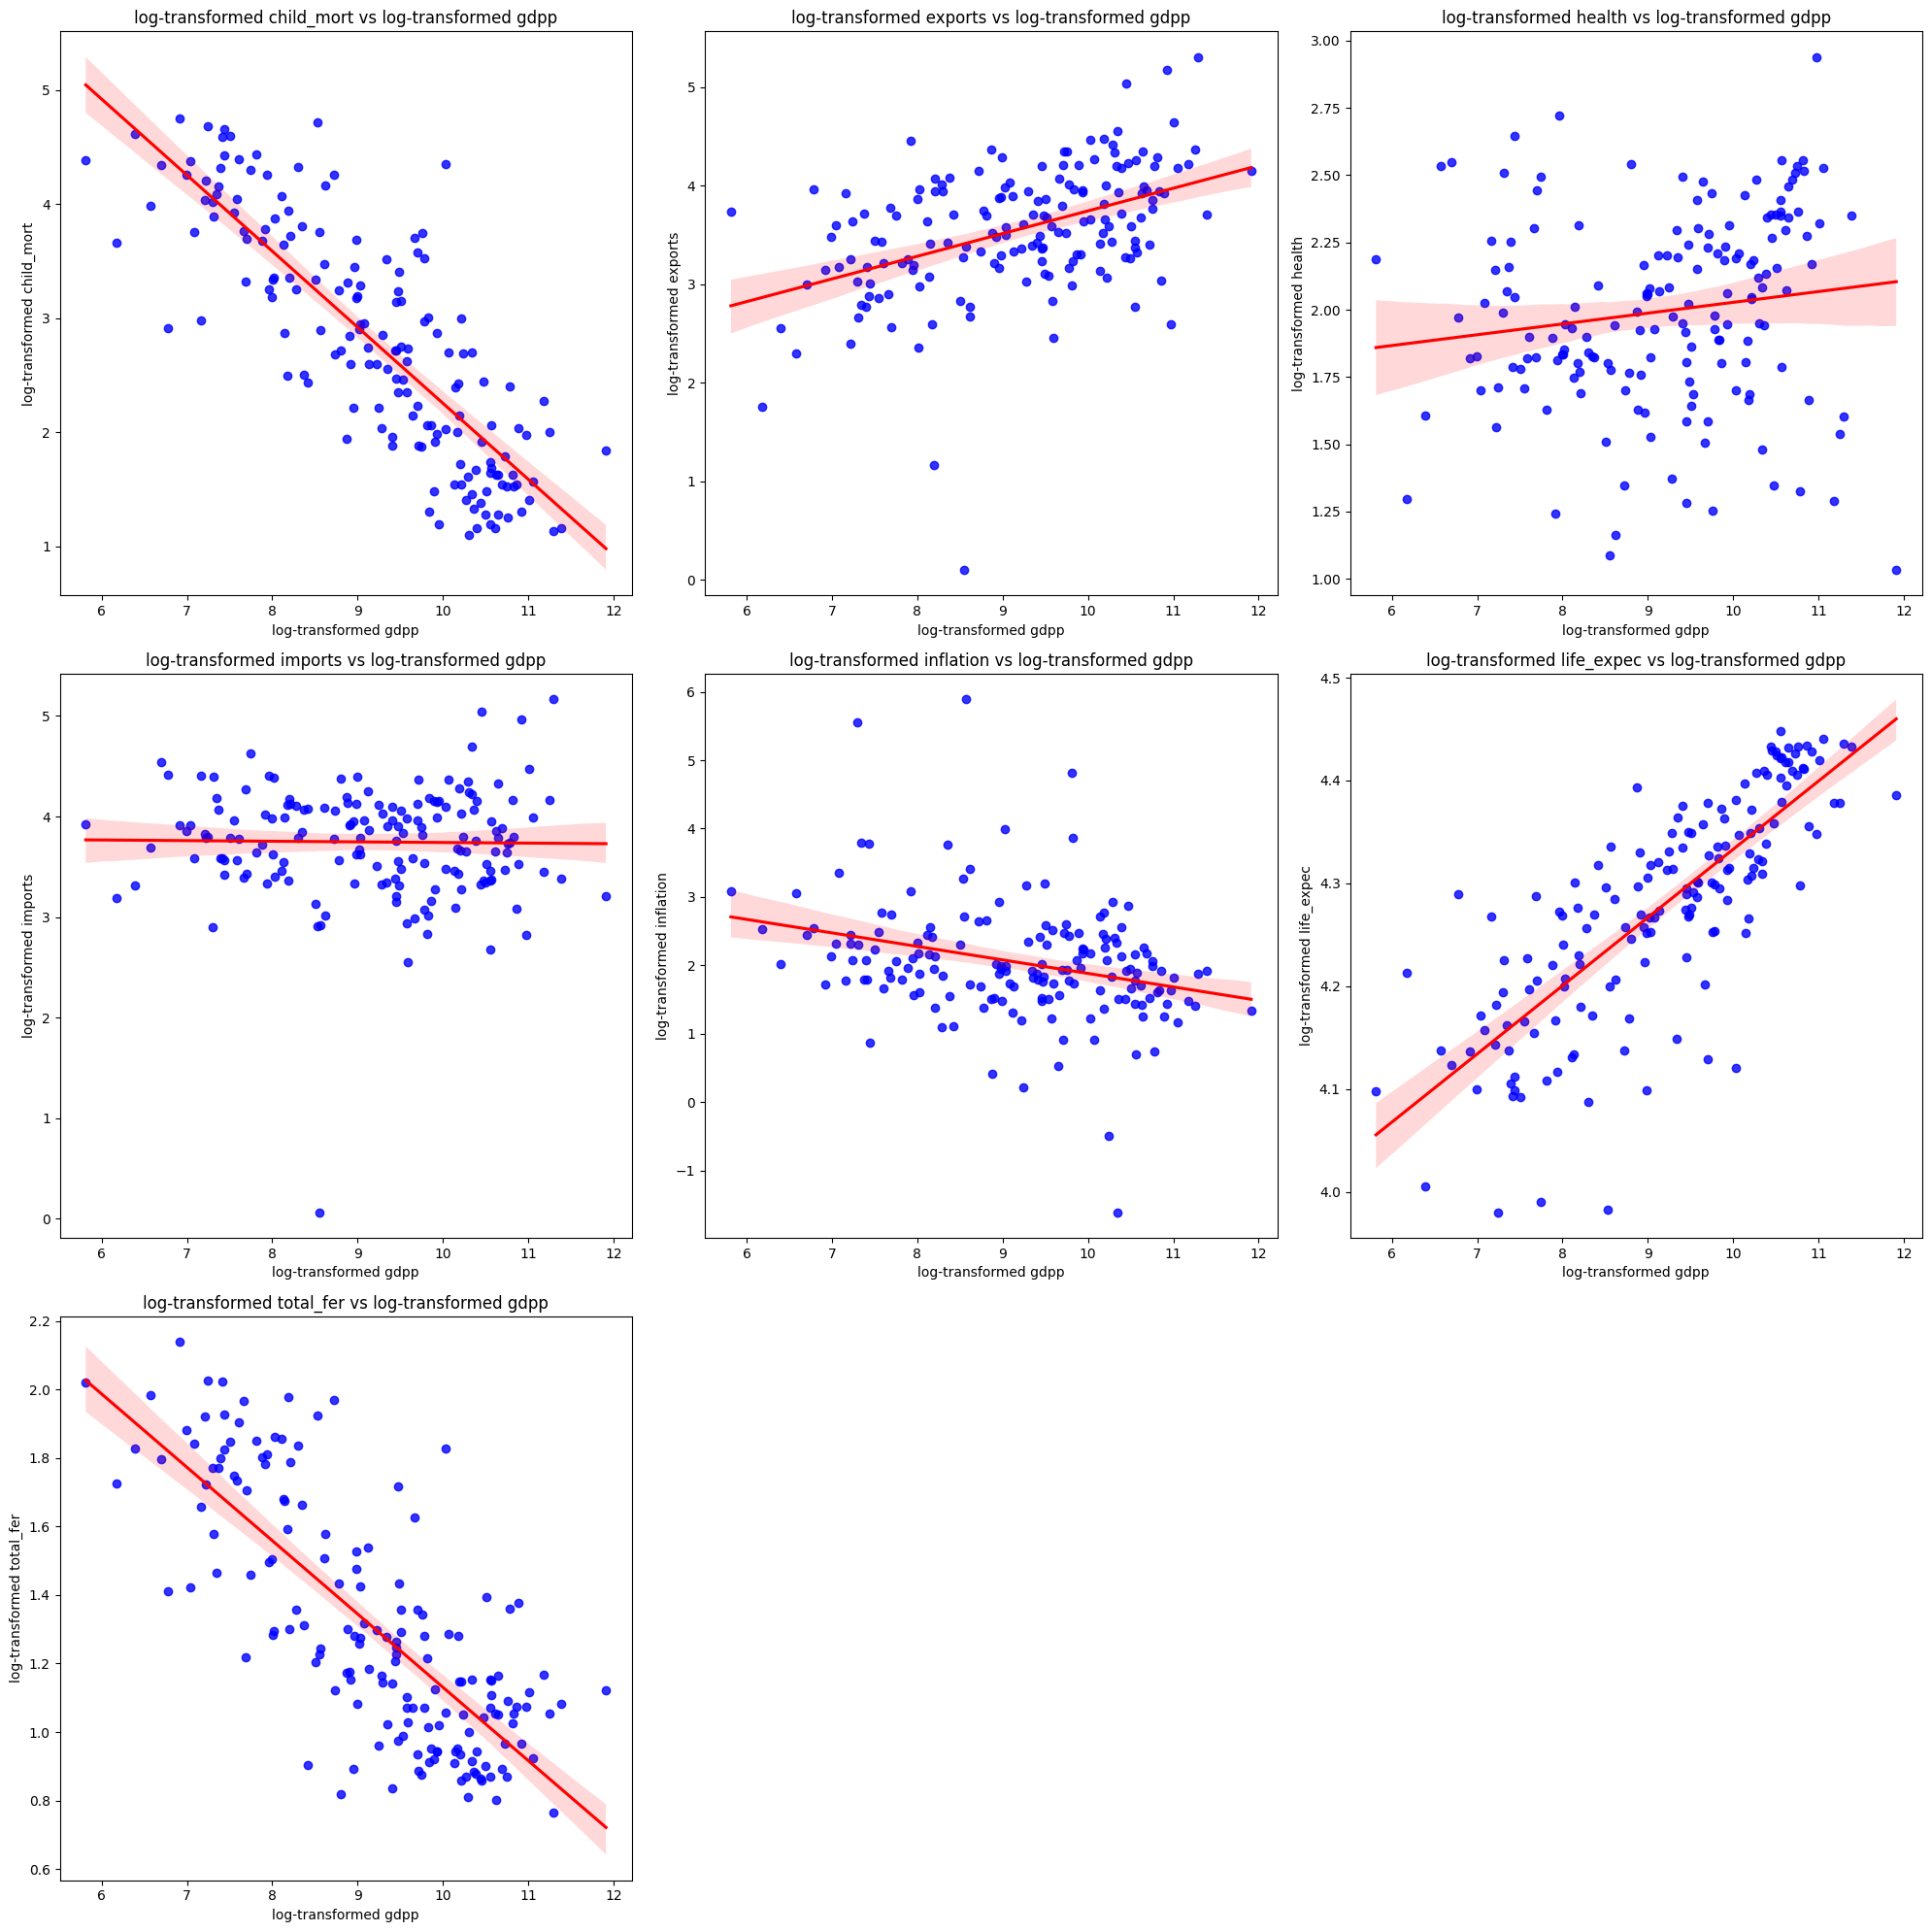

In [219]:
df_log_transformed_modifed = df_log_transformed.drop(['gdpp'], axis = 1)

# Set the size of the plot
plt.figure(figsize=(20, 20))

# Loop through the variables and create scatter plots with regression lines
for i, var in enumerate(df_log_transformed_modifed):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=df_log_transformed['gdpp'], y=df_log_transformed[var], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(f'log-transformed {var} vs log-transformed gdpp')
    plt.xlabel('log-transformed gdpp')
    plt.ylabel(f'log-transformed {var}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

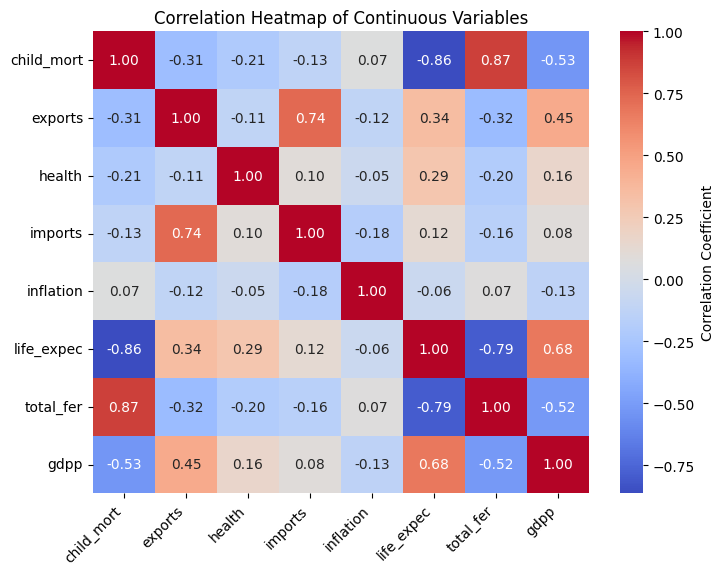

In [220]:
# Calculate the correlation matrix
correlations = df_numeric.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size to ensure the plot is not too cramped
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Continuous Variables')  # Add a title for clarity
plt.xticks(rotation=45, ha = 'right')  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure the y-axis labels are horizontal for clarity
plt.show()

##### Bivariate Analysis

1. **Log-transformed Child Mortality vs. Log-transformed GDP per Capita**:
   - **Observation**: There is a strong negative correlation between the log of child mortality rates and the log of GDP per capita.
   - **Interpretation**: As the log-transformed GDP per capita increases, the log-transformed child mortality rate decreases significantly. This indicates that higher GDP per capita is associated with lower child mortality rates, likely due to better healthcare and living conditions.

2. **Log-transformed Exports vs. Log-transformed GDP per Capita**:
   - **Observation**: There is a positive correlation between the log of exports (as a percentage of GDP) and the log of GDP per capita.
   - **Interpretation**: Countries with higher export percentages (log-transformed) tend to have higher GDP per capita (log-transformed). This suggests that export-oriented economies may achieve higher economic growth.

3. **Log-transformed Health Spending vs. Log-transformed GDP per Capita**:
   - **Observation**: There is a positive correlation between the log of health spending (as a percentage of GDP) and the log of GDP per capita.
   - **Interpretation**: Countries that spend more on health (log-transformed) tend to have higher GDP per capita (log-transformed). This indicates that investment in healthcare can be associated with higher economic productivity and better overall economic performance.

4. **Log-transformed Imports vs. Log-transformed GDP per Capita**:
   - **Observation**: There is a weak positive correlation between the log of imports (as a percentage of GDP) and the log of GDP per capita.
   - **Interpretation**: While the trend line indicates a slight positive relationship, the data points are widely scattered. This suggests that the relationship between imports and GDP per capita is not as strong as some other variables.

5. **Log-transformed Inflation vs. Log-transformed GDP per Capita**:
   - **Observation**: There is a weak negative correlation between the log of inflation rates and the log of GDP per capita.
   - **Interpretation**: While there is a downward trend, the relationship is not very strong, indicating that other factors might be influencing GDP per capita alongside inflation rates.

6. **Log-transformed Life Expectancy vs. Log-transformed GDP per Capita**:
   - **Observation**: There is a strong positive correlation between the log of life expectancy and the log of GDP per capita.
   - **Interpretation**: Countries with higher GDP per capita (log-transformed) tend to have higher life expectancy (log-transformed). This suggests that better economic conditions contribute to improved health and longer life spans.

7. **Log-transformed Total Fertility Rate vs. Log-transformed GDP per Capita**:
   - **Observation**: There is a negative correlation between the log of total fertility rate and the log of GDP per capita.
   - **Interpretation**: Higher GDP per capita (log-transformed) is associated with lower fertility rates (log-transformed). This could indicate that in wealthier countries, families tend to have fewer children, possibly due to higher living costs and better access to family planning resources.

### Machine Learning

#### K-Means

[Info](https://www.geeksforgeeks.org/k-means-clustering-introduction/)

![K-means](Images/K-means_img1.png)

![K-means](Images/K-means_img2.png)

![K-means](Images/K-means_img3.png)

![K-means](Images/K-means_img4.png)

![K-means](Images/K-means_img5.png)

![K-means](Images/K-means_img6.png)

![K-means](Images/K-means_img7.png)

![K-means](Images/K-means_img8.png)

##### Elbow Method

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [221]:
from sklearn.preprocessing import StandardScaler
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [222]:
df_scaled.shape

(167, 8)

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.

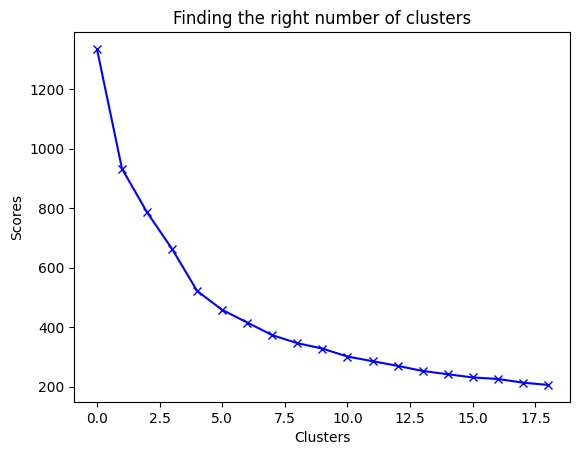

'\nkmeans.inertia_ is an attribute of the KMeans object from the scikit-learn library, and it measures the sum of squared distances of samples to their closest cluster center, also known as the within-cluster sum of squares (WCSS).\n\nIn other words, inertia_ quantifies how well the clustering algorithm has grouped the data points. Lower values of inertia are better, as they indicate that the data points are closer to their respective cluster centers, implying more compact clusters.\n'

In [223]:
from sklearn.cluster import KMeans

scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

"""
kmeans.inertia_ is an attribute of the KMeans object from the scikit-learn library, and it measures the sum of squared distances of samples to their closest cluster center, also known as the within-cluster sum of squares (WCSS).

In other words, inertia_ quantifies how well the clustering algorithm has grouped the data points. Lower values of inertia are better, as they indicate that the data points are closer to their respective cluster centers, implying more compact clusters.
"""

We will choose 3 as our optimal K-value

In [224]:
kmeans = KMeans(3, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [225]:
kmeans.cluster_centers_.shape

(3, 8)

In [226]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_numeric.columns])
cluster_centers           

,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,-0.795150,0.645374,0.597588,0.321616,-0.206854,1.078426,-0.774382,1.127832
1,1.460824,-0.482373,-0.186520,-0.152983,0.152855,-1.294206,1.456197,-0.761418
2,-0.318041,-0.145084,-0.283486,-0.122412,0.047507,0.037440,-0.328957,-0.300304


In [227]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_numeric.columns])
cluster_centers

,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,4.557143,58.746939,8.452245,54.653061,5.474694,79.654581,1.779184,42085.701816
1,66.241860,27.925814,6.304884,43.197674,18.120698,61.757907,5.145814,2837.425123
2,17.602667,37.143853,6.039333,43.935545,14.417067,71.802468,2.451467,12416.849888


In [228]:
labels.shape 

(167,)

In [229]:
labels.max()

2

In [230]:
labels.min()

0

In [231]:
y_kmeans = kmeans.fit_predict(df_numeric)
y_kmeans

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [232]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df_numeric, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()


,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp,cluster
0,55.7,10.0,7.58,44.9,9.1,61.982,5.82,1357.9878,1
1,9.5,28.0,6.55,48.6,4.8,76.463,1.65,12978.1010,2
2,22.3,38.4,4.17,31.4,9.0,76.377,2.89,13506.4440,2
3,69.4,62.3,2.85,42.9,13.1,61.643,6.16,6118.9050,1
4,6.1,45.5,6.03,58.9,5.0,78.497,2.13,12200.0000,2


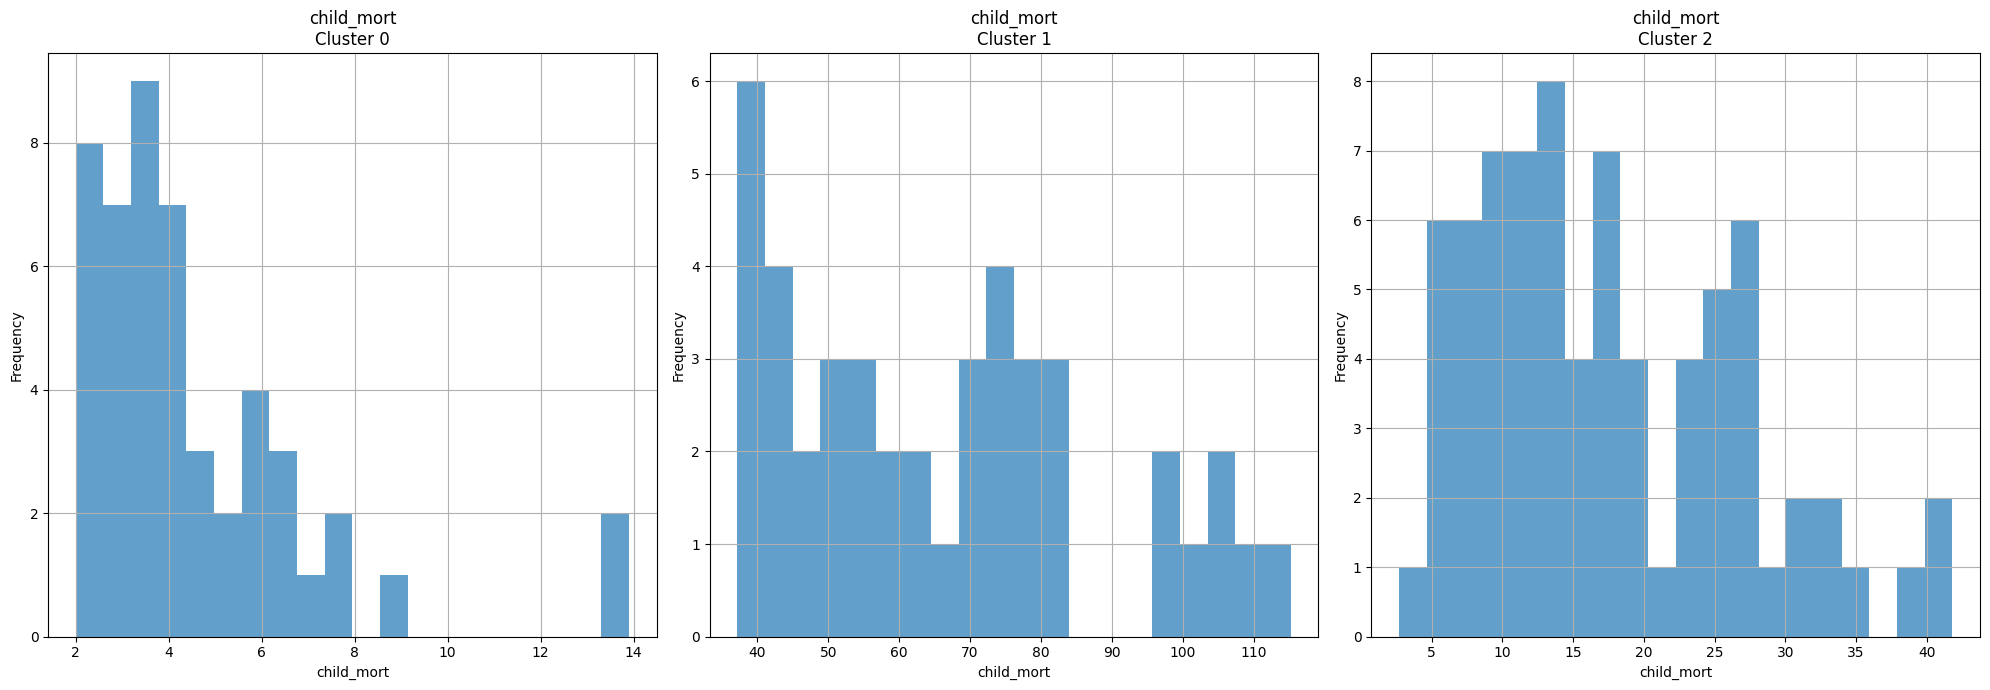

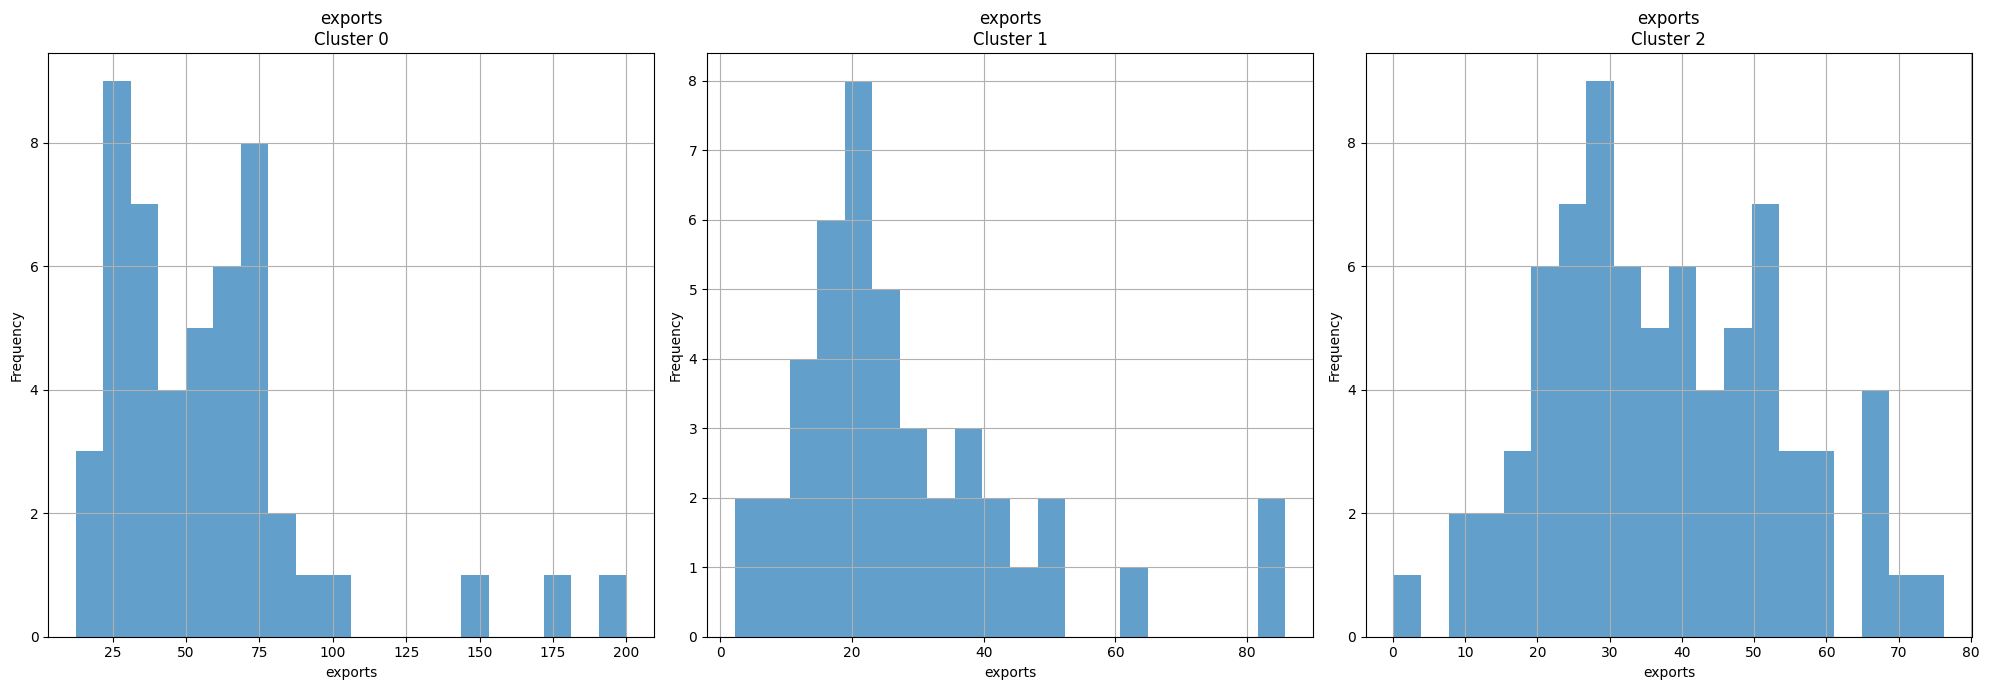

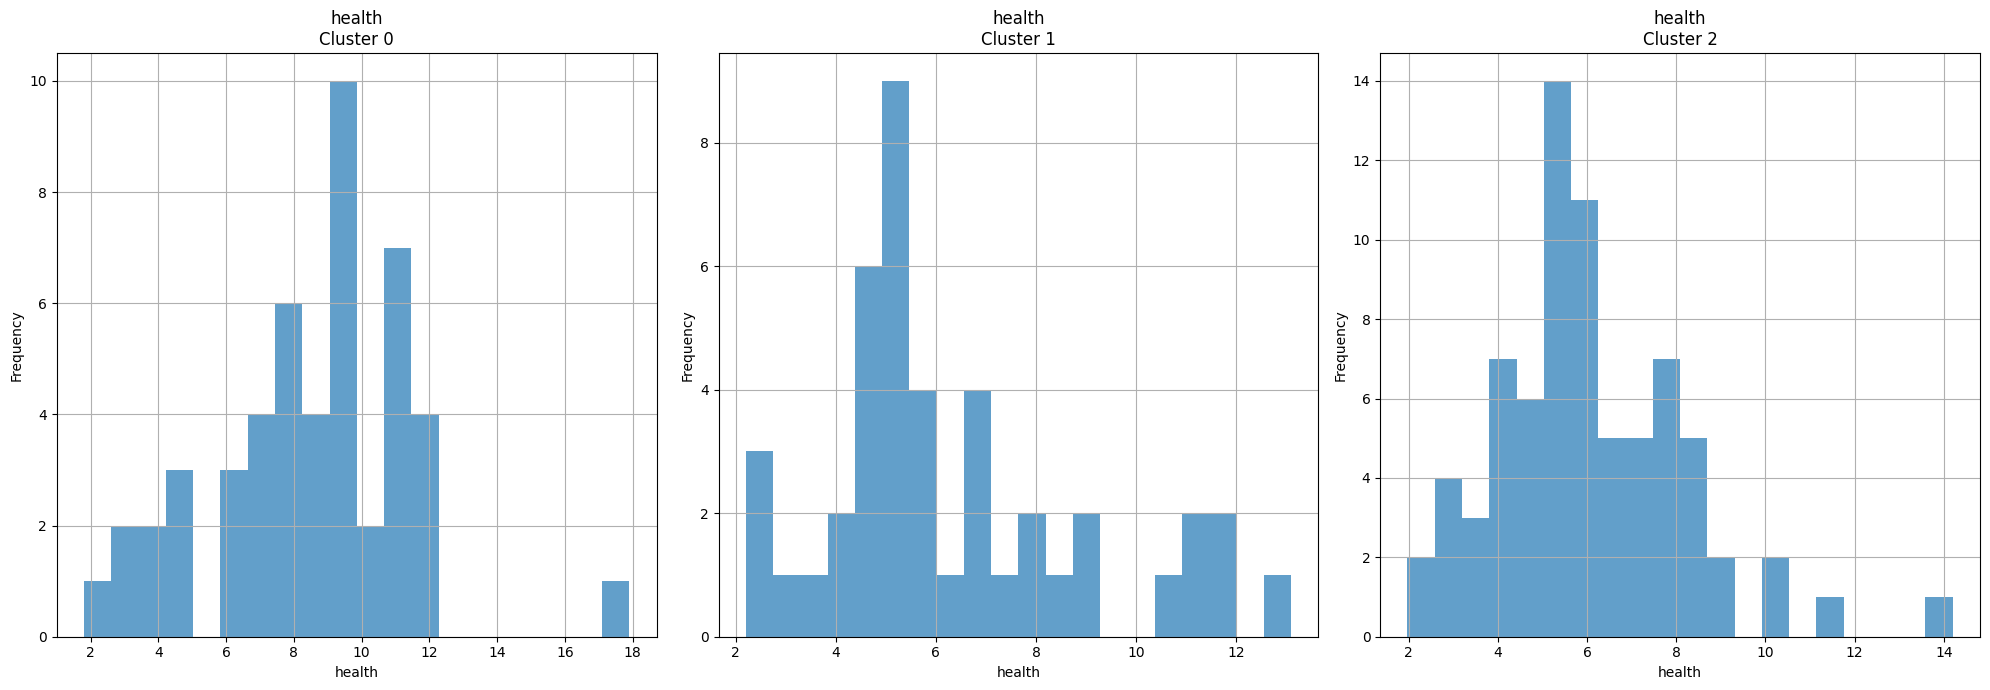

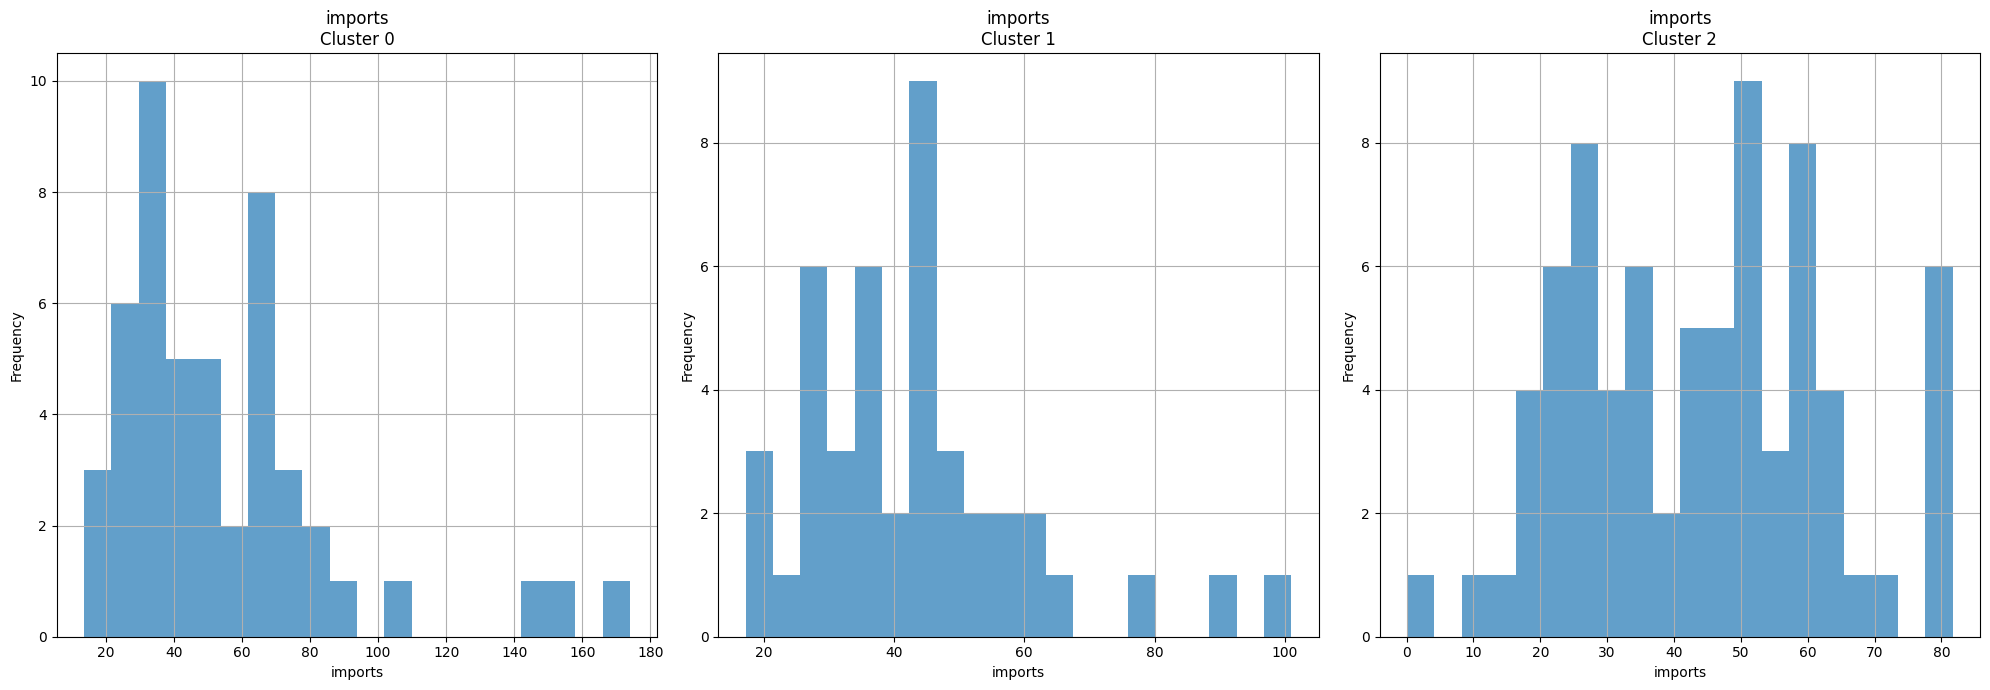

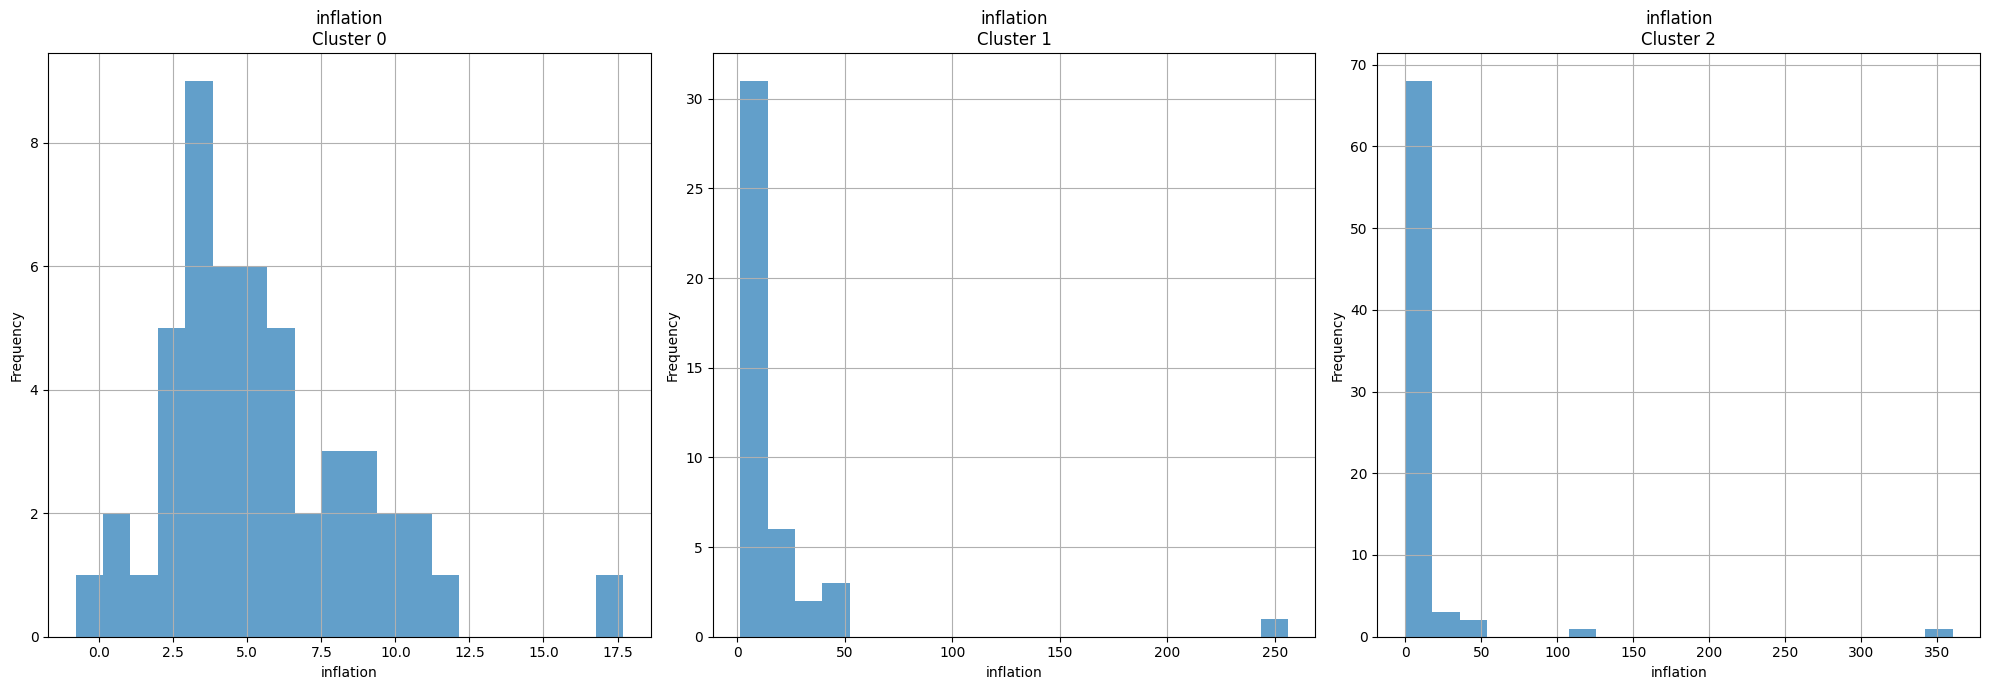

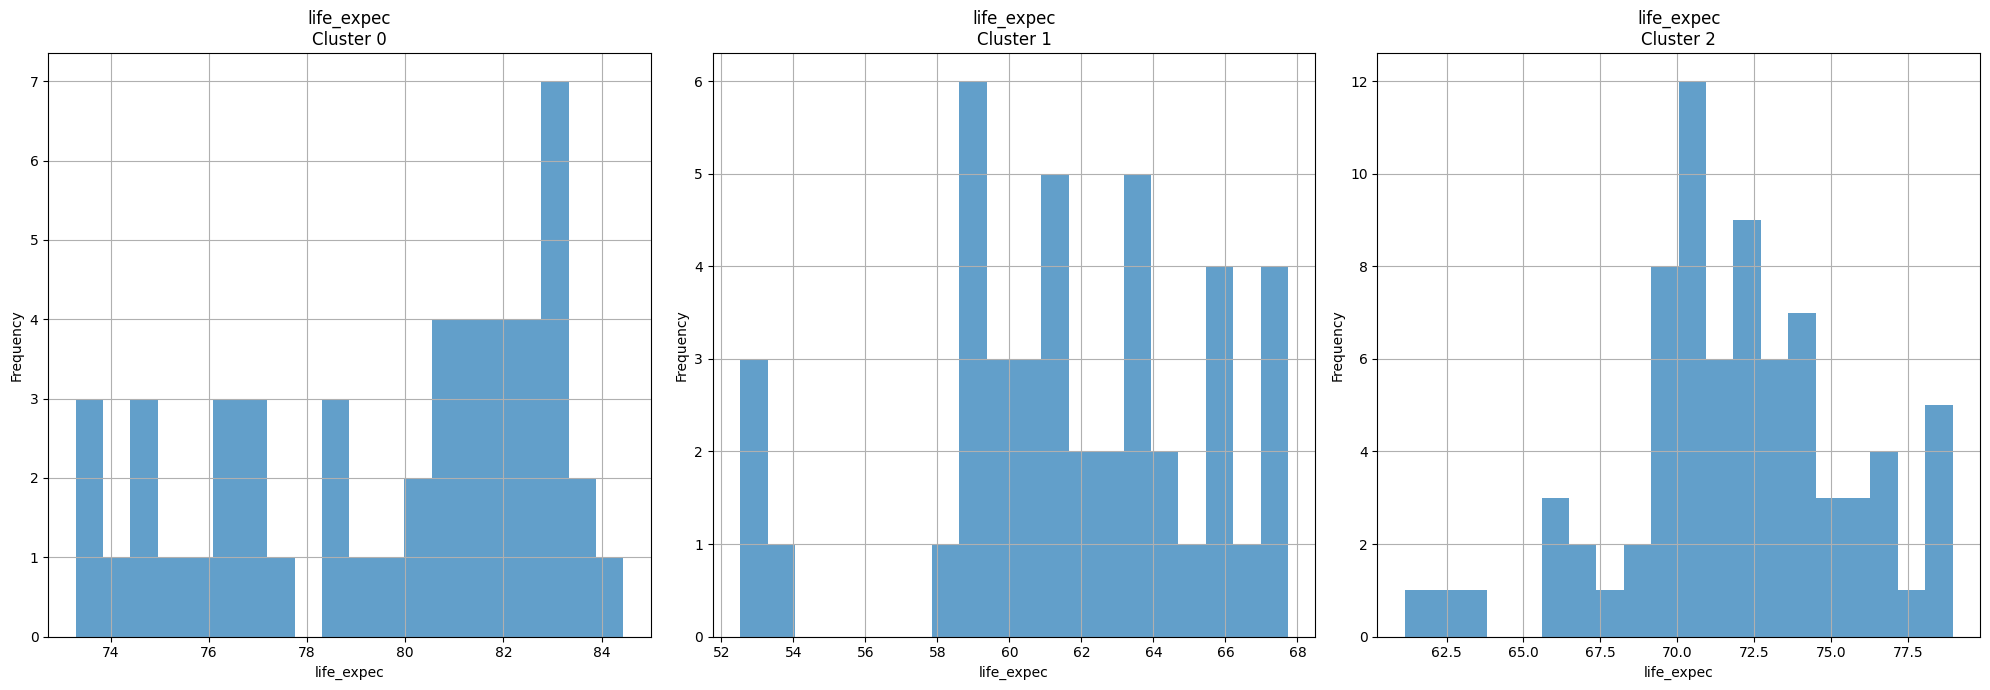

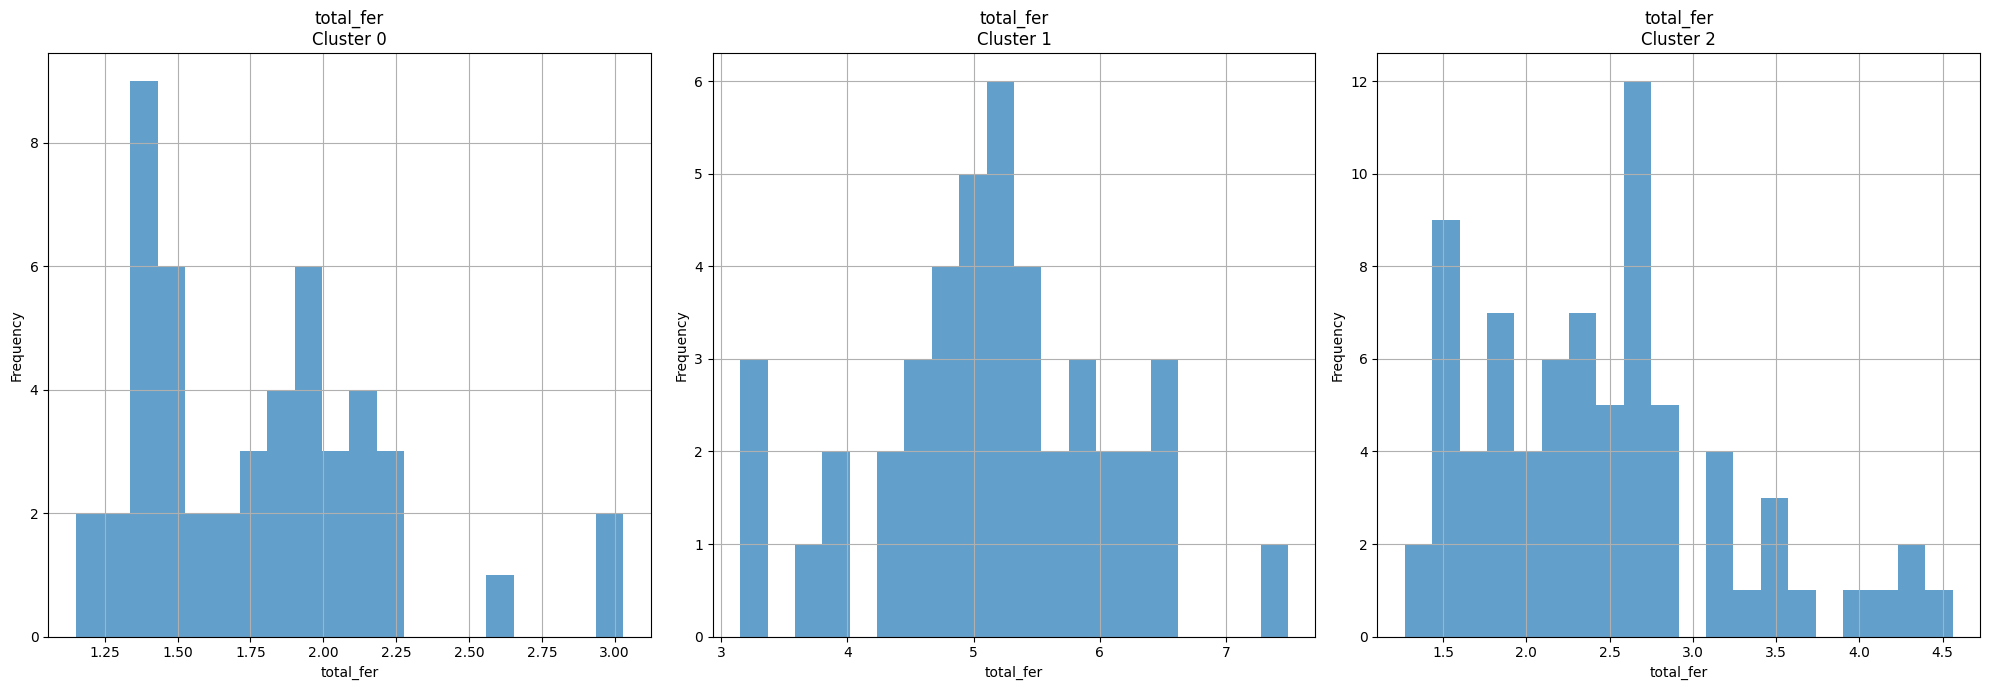

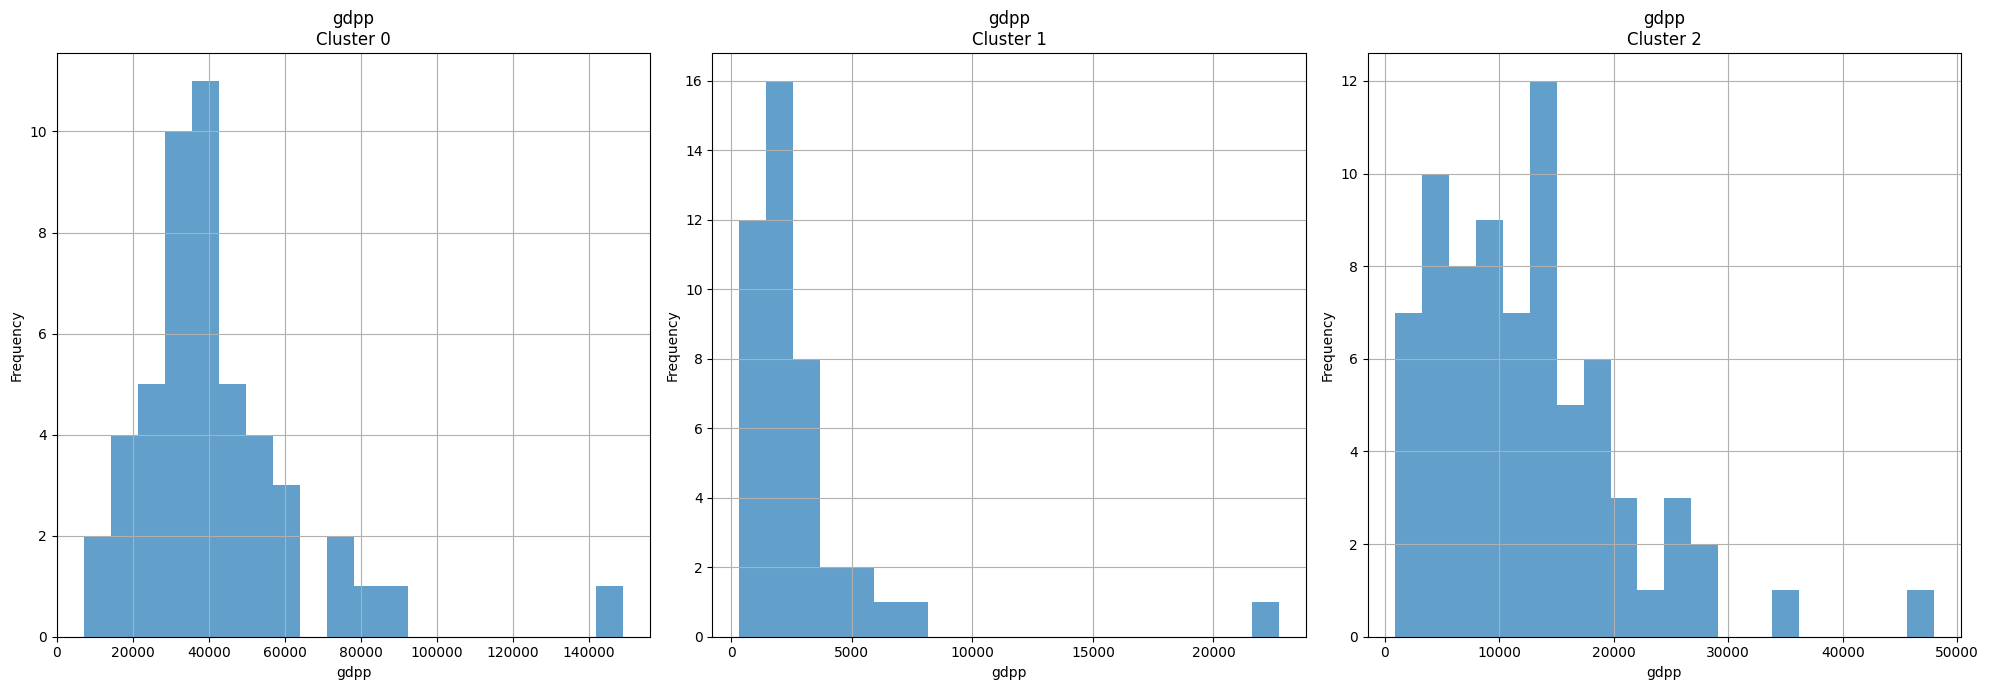

In [233]:
# Plot the histograms for different clusters
for column in df_numeric.columns: 
    plt.figure(figsize=(20, 7))
    for cluster_id in range(3):
        plt.subplot(1, 3, cluster_id + 1)
        cluster_data = df_cluster[df_cluster['cluster'] == cluster_id]
        cluster_data[column].hist(bins=20, alpha=0.7)
        plt.title('{}\nCluster {}'.format(column, cluster_id))
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [234]:
# concatenate the clusters labels to our original dataframe
df_cluster_country = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

cluster_1_df = df_cluster_country[df_cluster_country['cluster'] == 1]

sorted_cluster_1_df = cluster_1_df.sort_values(by=['life_expec', 'child_mort', 'gdpp'], ascending=[True, False, True])

sorted_cluster_1_df.head(10)['country'].to_list()

['Chad',
 'Nigeria',
 'Lesotho',
 'Central African Republic',
 "Cote d'Ivoire",
 'Guinea',
 'Mali',
 'Congo, Dem. Rep.',
 'Namibia',
 'Burkina Faso']


**Summary**

**Cluster 0: Developed Nations**
- **Child Mortality:**
  - Low rates, suggesting effective healthcare and child welfare systems.
- **Exports:**
  - Moderate to high, indicative of a robust trade infrastructure.
- **Health Expenditures:**
  - Higher spending on health.
- **Imports:**
  - Moderate to high, indicating a healthy trade balance.
- **Inflation:**
  - Low, indicating stable economic conditions.
- **Life Expectancy:**
  - High, typical for nations with advanced healthcare systems.
- **Fertility Rates:**
  - Low, correlating with higher education levels and access to family planning.
- **GDP per Capita:**
  - High, with peaks around $40,000, supporting high standards of living and strong economic development.

**Cluster 1: Underdeveloped Nations**
- **Child Mortality:**
  - High rates, pointing to inadequate healthcare services.
- **Exports:**
  - Low, which could indicate limited integration into global markets.
- **Health Expenditures:**
  - Low, suggesting limited access to healthcare.
- **Imports:**
  - Low, indicating limited trade activities.
- **Inflation:**
  - High, reflecting economic instability.
- **Life Expectancy:**
  - Low, due to poor health infrastructure and other socio-economic factors.
- **Fertility Rates:**
  - High, often seen in nations with lower access to education and healthcare.
- **GDP per Capita:**
  - Very low, generally below $2,500, indicating severe economic challenges.

**Cluster 2: Developing Nations**
- **Child Mortality:**
  - Moderate to high, suggesting improving but still challenging healthcare conditions.
- **Exports:**
  - Varied, generally lower than developed nations, indicating growing trade activities.
- **Health Expenditures:**
  - Moderate, showing efforts to improve healthcare access.
- **Imports:**
  - Varied, indicating a mix of trade activities.
- **Inflation:**
  - Varied, with many experiencing moderate to high rates, a common challenge in developing economies.
- **Life Expectancy:**
  - Moderate, better than underdeveloped nations but below developed ones.
- **Fertility Rates:**
  - Moderate to high, transitioning as education and healthcare improve.
- **GDP per Capita:**
  - Mostly below $10,000, reflecting emerging economic conditions.

#### Principal Componennt Analysis (PCA)

![PCA](Images/PCA.png)

**Principal Component Analysis (PCA)** is a statistical technique used in data analysis and machine learning to reduce the dimensionality of a dataset while preserving as much variability as possible. PCA transforms the original variables into a new set of variables called principal components, which are orthogonal (uncorrelated) and ordered by the amount of variance they capture from the data.

**How PCA Works**

1. **Standardization**: Standardize the data if the variables have different units or scales.
2. **Covariance Matrix Computation**: Calculate the covariance matrix to understand how variables are related.
3. **Eigenvalue and Eigenvector Calculation**: Compute eigenvalues and eigenvectors of the covariance matrix. Eigenvectors determine the direction of the new feature space, while eigenvalues determine their magnitude.
4. **Principal Components**: Select the top \(k\) eigenvectors (principal components) that correspond to the largest eigenvalues. These principal components capture the most variance in the data.
5. **Transformation**: Project the original data onto the new feature space formed by the selected principal components.

**Uses of PCA**

1. **Dimensionality Reduction**: Reduces the number of variables while retaining the most important information, making it easier to visualize and analyze high-dimensional data.
2. **Noise Reduction**: By discarding components with low variance, PCA can help in reducing noise in the data.
3. **Feature Extraction**: Creates new features that are combinations of the original features, which can improve the performance of machine learning models.
4. **Visualization**: Helps in visualizing high-dimensional data in 2D or 3D plots.
5. **Preprocessing for Machine Learning**: Used as a preprocessing step to improve the efficiency and performance of machine learning algorithms.

**Pros of PCA**

1. **Simplifies Data**: Reduces the complexity of data by transforming it into fewer dimensions.
2. **Improves Performance**: Can lead to faster and more efficient machine learning models due to reduced number of features.
3. **De-noising**: Helps in removing noise from data, improving model accuracy.
4. **Uncorrelated Features**: Transformed features (principal components) are uncorrelated, which can be beneficial for certain algorithms.

**Cons of PCA**

1. **Loss of Information**: Reducing dimensions may result in some loss of information, especially if too many components are discarded.
2. **Interpretability**: Principal components are linear combinations of the original features, making them less interpretable.
3. **Assumes Linearity**: PCA captures only linear relationships between features and may not be effective for capturing complex, nonlinear relationships.
4. **Scale Sensitivity**: PCA is sensitive to the scale of the data. Features need to be standardized before applying PCA to avoid biased results.

In [235]:
from sklearn.decomposition import PCA

# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)

In [236]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.656684,0.073038
1,0.771181,-0.551124
2,0.010252,-0.382301
3,-2.628904,1.659810
4,1.047910,0.123971


In [237]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.656684,0.073038,1
1,0.771181,-0.551124,2
2,0.010252,-0.382301,2
3,-2.628904,1.659810,1
4,1.047910,0.123971,2


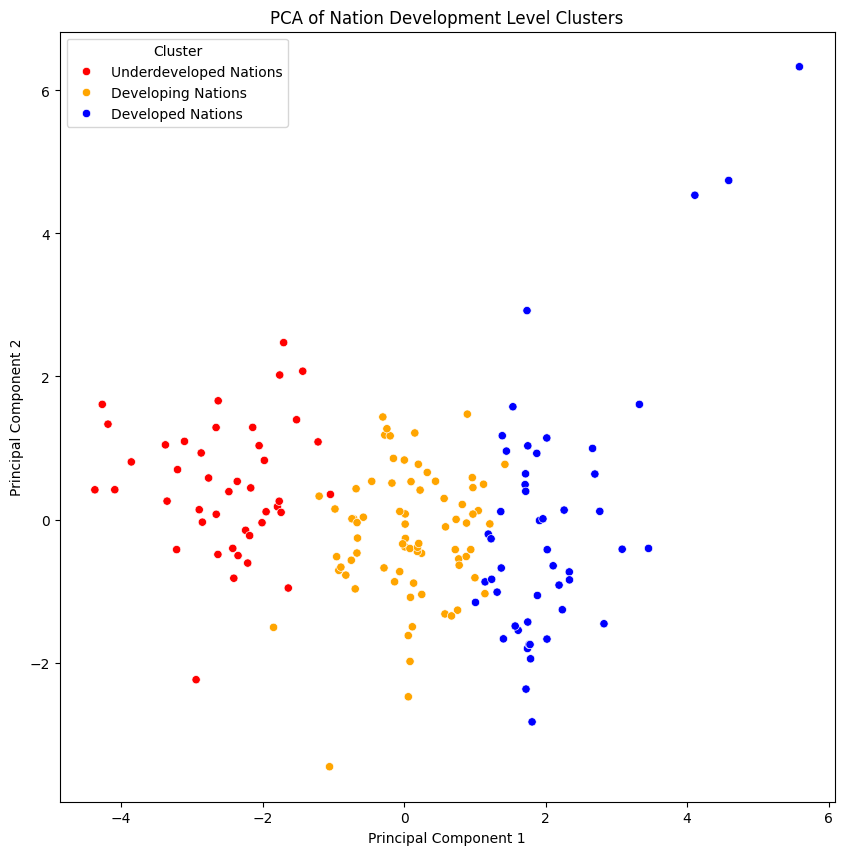

In [238]:
# Dictionary to map numerical cluster labels to meaningful names
cluster_names = {0: 'Developed Nations', 1: 'Underdeveloped Nations', 2: 'Developing Nations'}

# Update the cluster labels in the DataFrame
pca_df['cluster'] = pca_df['cluster'].map(cluster_names)

# Plot the scatter plot with updated cluster labels
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'orange', 'blue'])
plt.title('PCA of Nation Development Level Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Autoencoders

![auto-encoders](Images/auto-encoders_1.png)

![auto-encoders](Images/auto-encoders_2.png)

![auto-encoders](Images/auto-encoders_3.png)

Autoencoders are a type of artificial neural network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction or feature learning. Autoencoders are also used for generative modeling and anomaly detection.

**Structure of Autoencoders**

Autoencoders consist of two main parts:
1. **Encoder**: This part compresses the input data into a latent-space representation (bottleneck). It maps the input data to a lower-dimensional space.
2. **Decoder**: This part reconstructs the input data from the latent-space representation. It maps the lower-dimensional data back to the original input space.

The network is trained to minimize the difference between the input and the reconstructed output, often using a loss function such as Mean Squared Error (MSE).

**Types of Autoencoders**

1. **Vanilla Autoencoders**: The basic form with one or more hidden layers in both the encoder and decoder.
2. **Sparse Autoencoders**: Introduce sparsity constraints on the hidden units to learn useful features even with a larger number of neurons.
3. **Denoising Autoencoders**: Train the network to remove noise from the input data by corrupting the input and training the network to recover the original input.
4. **Variational Autoencoders (VAEs)**: Introduce a probabilistic approach to encode input data, useful for generating new data similar to the training data.
5. **Convolutional Autoencoders**: Use convolutional layers to preserve spatial information, making them suitable for image data.

**Uses of Autoencoders**

1. **Dimensionality Reduction**: Similar to PCA, but can capture more complex patterns due to non-linearity.
2. **Feature Learning**: Automatically learns features from data that can be used in other machine learning tasks.
3. **Data Denoising**: Can clean noisy data by training on noisy inputs and learning to reconstruct the clean version.
4. **Anomaly Detection**: Detects anomalies by learning a compact representation of normal data and identifying deviations from it.
5. **Generative Modeling**: Can generate new data points similar to the training data, especially useful in applications like image generation.

**Pros of Autoencoders**

1. **Non-linear Transformations**: Can learn complex, non-linear relationships in data.
2. **Versatility**: Applicable to various types of data, including images, text, and time series.
3. **Dimensionality Reduction**: More powerful than linear methods like PCA for capturing underlying data structures.
4. **Data Compression**: Efficiently compresses data into lower dimensions, retaining significant information.
5. **Anomaly Detection**: Effective in identifying outliers or anomalies in data.

**Cons of Autoencoders**

1. **Training Complexity**: Requires extensive training and can be computationally intensive.
2. **Hyperparameter Tuning**: Performance is sensitive to the choice of hyperparameters like the number of layers, neurons, and regularization techniques.
3. **Overfitting**: Prone to overfitting, especially with small datasets or overly complex models.
4. **Interpretability**: Encoded representations and learned features may not be easily interpretable.
5. **Requires Large Datasets**: Typically requires a large amount of data for effective training.

In [239]:

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

encoding_dim = 3

input_df = Input(shape=(8,))

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(128, activation='relu', kernel_initializer=glorot_uniform())(x)
x = Dense(128, activation='relu', kernel_initializer=glorot_uniform())(x)
x = Dense(256, activation='relu', kernel_initializer=glorot_uniform())(x)

encoded = Dense(encoding_dim, activation='relu', kernel_initializer=glorot_uniform())(x)

x = Dense(256, activation='relu', kernel_initializer= 'glorot_uniform')(encoded)
x = Dense(128, activation='relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(128, activation='relu', kernel_initializer= 'glorot_uniform')(x)

decoded = Dense(8, activation='sigmoid', kernel_initializer=glorot_uniform())(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder - used for our dimension reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [240]:
df_scaled.shape

(167, 8)

In [241]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

autoencoder.fit(df_scaled, df_scaled, batch_size=32, epochs=50, verbose=1, callbacks=[early_stopping])

Epoch 1/50
1/6 [====>.........................] - ETA: 1s - loss: 1.0194

2024-05-15 15:46:01.641135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 21ms/step - loss: 1.2142
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.9854
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.9449
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.9311
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.9459
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.9842
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0743
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 1.0922
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 1.1003


In [242]:
pred = encoder.predict(df_scaled)

6/6 [==============================] - 0s 2ms/step


2024-05-15 15:46:02.350629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.

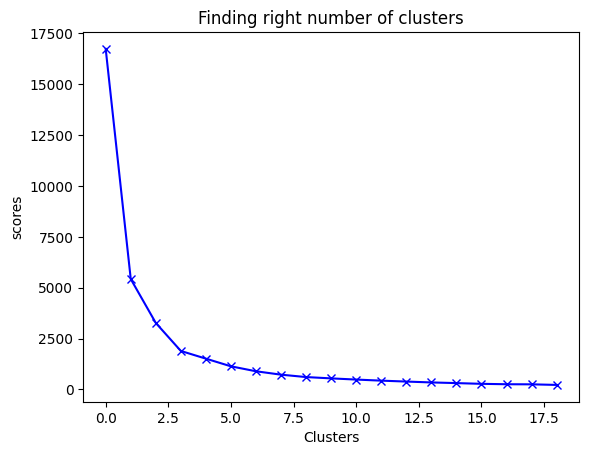

In [243]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

/var/folders/7w/91yzmsvx30sfywvm8z7prz5c0000gn/T/ipykernel_83004/2080318352.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.

/var/folders/7w/91yzmsvx30sfywvm8z7prz5c0000gn/T/ipykernel_83004/2080318352.py:4: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.



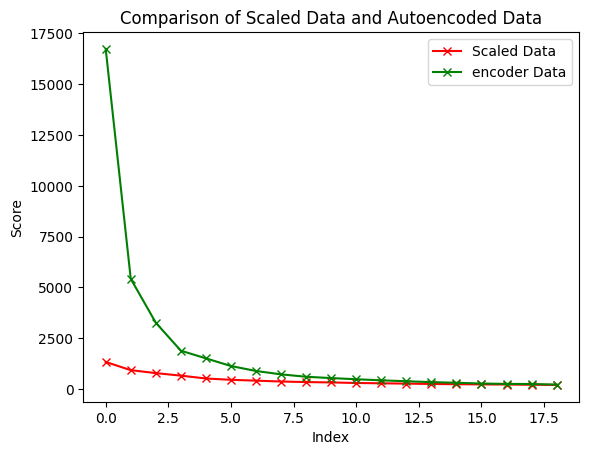

In [244]:
# Plot scores_1 with a label
plt.plot(scores_1, 'bx-', color='r', label='Scaled Data')
# Plot scores_2 with a label
plt.plot(scores_2, 'bx-', color='g', label='encoder Data')

# Add legends to the plot
plt.legend()

# Optionally, add titles and labels for better clarity
plt.title('Comparison of Scaled Data and Autoencoded Data')
plt.xlabel('Index')
plt.ylabel('Score')

# Display the plot
plt.show()

### Transform Data for Tableau Dashboard

In [245]:
df_cluster_country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster       0
dtype: int64

In [246]:
df_cluster_country.to_csv("Data/archive/Country-data-cluster.csv")

In [247]:
pca_df.to_csv("Data/archive/pca.csv")

In [248]:
df_long_lat = pd.read_html('http://www.csgnetwork.com/llinfotable.html', header = 0)[5]
df_long_lat.to_csv("Data/archive/long_lat_data.csv")

### Tableau Dashboard

![Dashboard](Data/archive/Dashboard.png)